## Class for poseData

In [151]:
import cv2

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]


class poseData():
    """
    """
    
    def __init__(self):
        self.POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
                          [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
                          [1,0], [0,14], [14,16], [0,15], [15,17],
                          [2,17], [5,16]]
        self.KEYPOINTS =  ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                            'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                            'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']
        self.WindowH = 640
        self.WindowW = 360
    
    def dict_to_intDict(self, dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}
        
    def plotSinglePose(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
    
    def plotSinglePose2(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        xs = []
        ys = []
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs.append([posePoint[pair[0]][0], posePoint[pair[1]][0]])
                ys.append([posePoint[pair[0]][1], posePoint[pair[1]][1]])
            
        plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
        
    def savePoseSequence(self, posePointsDict): ## PosePointsDict is a dictionary w. int point
        fourcc = cv2.VideoWriter_fourcc(*'AVC1')
        out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
        
        for person in posePointsDict:
            for pair in self.POSE_PAIRS:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (person[pair[0]][0] != -1)
                valid_pt2 = (person[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [person[pair[0]][0], person[pair[1]][0]]
                    ys = [person[pair[0]][1], person[pair[1]][1]]
                    plt.plot(xs, ys,'ko-')
        

        
def getPoseLines(file):
    #count = 1
    with open(frameDir + file, "r") as f:
        for line in f:
            yield json.loads(line)
            """
            try:
                yield json.loads(line)
            except:
                print(f"Cant read JSON line {count}, {file}")
            count += 1
            """


def dict_to_intDict(dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}

def getFlattenedPose(poseDict):
    
    flat = []
    
    #--- Check if keys are int. If string, turn the keys to int
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    #--- Get coords of key points
    for keypoint in range(0, 18):
        flat.append(poseDict[keypoint])
    
    #--- Convert to numpy array and then flatten the coords list
    flat = np.array(flat).flatten()
    return flat

'''
def getFlattenedPose_str(strPoseDict):
    intPoseDict = dict_to_intDict(strPoseDict)
    flat = []
    
    for keypoint in range(0, 18):
        flat.append(intDict[keypoint])
    
    flat = np.array(flat).flatten()
    return flat
'''

def getValidHeight(poseDict):
    """
    Assumes the pose is upright
    
    valid height = Nose to R-Knee, Nose to L-Knee, Neck to R-Knee, Nect to L-Knee in y coords
    Retrun person valid height
    
    """
    
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    nose_y = poseDict[KEYPOINTS.index('Nose')][1]
    neck_y = poseDict[KEYPOINTS.index('Neck')][1]
    rknee_y = poseDict[KEYPOINTS.index('R-Knee')][1]
    lknee_y = poseDict[KEYPOINTS.index('L-Knee')][1]
    
    h1, h2, h3, h4 = (-1, -1, -1, -1)
    
    if nose_y >0:
        if rknee_y >0:
            h1 = abs(nose_y - rknee_y)
            
        if lknee_y >0:
            h2 = abs(nose_y - lknee_y)
            
    if neck_y >0:
        if rknee_y >0:
            h3 = abs(neck_y - rknee_y)
            
        if lknee_y >0:
            h4 = abs(neck_y - lknee_y)
    
    return [h1, h2, h3, h4]

def getOnePose(multi_person):
    """
    multi_person should be a dictionary of person poses
    {"person0": pose0,
     "person1": pose1,
     "person2": pose2
    }
    
    returns one person pose with largest height:
    {"personMax": poseMax}
    """
    hts = []
    persons = []
    for person, pose in multi_person.items():
        persons.append(person)
        hts.append(getValidHeight(pose))
    
    hts = np.array(hts)
    
    maxHtIdx = []
    for i in range(hts.shape[1]):
        maxHtIdx.append(np.argmax(hts[:,i]))
    # get the most frequent index
    freqIdx = (max(map(lambda val: (maxHtIdx.count(val), val), set(maxHtIdx)))[1])
    
    maxHtPerson = persons[freqIdx]
    pose = {maxHtPerson: multi_person[maxHtPerson]}
    
    return pose

frameDir = "../data/frames/"
frameFiles = ["4nHElVbT3HY_1.json", "4nHElVbT3HY_1_aws.json", "4nHElVbT3HY_2_aws.json", \
         "ITNiqNcl6Mw_1_aws.json", "ITNiqNcl6Mw_2_aws.json", "M_rPhEjym1o_1_aws.json", "M_rPhEjym1o_2_aws.json", \
         "L5mqL7ADEsY_1_aws.json"]


### To assemble data for the model

In [128]:
#### FOR Testing Code
temp = {"person0": {"0": [222, 112], "1": [228, 136], "2": [205, 136], "3": [199, 169],
                    "4": [206, 198], "5": [247, 137], "6": [253, 175], "7": [245, 184], "8": [214, 200],
                    "9": [207, 254], "10": [213, 301], "11": [238, 206], "12": [236, 254], "13": [214, 292],
                    "14": [221, 105], "15": [229, 105], "16": [214, 107], "17": [237, 106]}}

temp_multi = {"person0": {"0": [379, 136], "1": [378, 152], "2": [361, 152],
                            "3": [347, 176], "4": [347, 207], "5": [394, 152],
                            "6": [400, 176], "7": [394, 183], "8": [362, 198],
                            "9": [353, 237], "10": [369, 263], "11": [385, 199],
                            "12": [378, 239], "13": [362, 284], "14": [378, 129],
                            "15": [386, 129], "16": [370, 129], "17": [387, 129]},
                "person1": {"0": [-1, -1], "1": [626, 152], "2": [612, 152],
                            "3": [611, 168], "4": [620, 175], "5": [637, 151], 
                            "6": [637, 167], "7": [-1, -1], "8": [612, 176], 
                            "9": [621, 190], "10": [612, 216], "11": [629, 176], 
                            "12": [637, 191], "13": [637, 215], "14": [-1, -1], 
                            "15": [-1, -1], "16": [-1, -1], "17": [-1, -1]}
               }

temp2_multi = {"person0": {"0": [377, 129], "1": [370, 152], "2": [354, 152], "3": [339, 182], "4": [362, 198], "5": [385, 152], "6": [386, 183], "7": [378, 168], "8": [354, 199], "9": [354, 238], "10": [331, 277], "11": [370, 199], "12": [385, 232], "13": [354, 255], "14": [370, 128], "15": [378, 128], "16": [362, 130], "17": [-1, -1]}, "person1": {"0": [527, 143], "1": [534, 151], "2": [520, 152], "3": [518, 160], "4": [-1, -1], "5": [542, 151], "6": [550, 160], "7": [550, 175], "8": [526, 168], "9": [526, 176], "10": [526, 192], "11": [541, 168], "12": [-1, -1], "13": [-1, -1], "14": [526, 137], "15": [528, 137], "16": [-1, -1], "17": [534, 137]}, "person3": {"0": [596, 135], "1": [596, 144], "2": [588, 144], "3": [-1, -1], "4": [-1, -1], "5": [604, 144], "6": [604, 152], "7": [597, 153], "8": [589, 160], "9": [567, 176], "10": [573, 192], "11": [597, 160], "12": [598, 169], "13": [-1, -1], "14": [596, 130], "15": [597, 130], "16": [-1, -1], "17": [-1, -1]}}
salsaPoseData = [] #This will become dancers X poses(or frames) X 36
count1 = 0
count2 = 0

fps = 24
fps_analysis = 8
fps_step = 3 #for frame differences/steps

seq_info = {}

pose_data_by_dancer = []
for file in frameFiles:
    #lineitems = getLines(file)
    prev_frame = 0
    dancer = []
    for line in getPoseLines(file):
        frame_no = line["frame_no"]
        
        #Step1: If time between consective successful frames > 2 secs that is 48
        if prev_frame == 0 or (frame_no - prev_frame)>48:
            # Begin new dancer, but first save previous dancer info if valid
            if len(dancer)>0:
                pose_data_by_dancer.append(dancer)
                
            dancer = []
        
        #Step2: if multi-person frame, get one person
        if line["person_count"] >1:
            dancer_pose = getOnePose(line["pers_coords"])
        else:
            dancer_pose = line["pers_coords"]
        
        #Step3: Flatten the pose
        pose_coords = list(dancer_pose.values())[0]
        
        #Step4: Add pose to dancer
        dancer.append(getFlattenedPose(pose_coords))
        
        #reset
        prev_frame = frame_no
        
print(len(pose_data_by_dancer))
for i in range(len(pose_data_by_dancer)):
    poses = len(pose_data_by_dancer[i])
    if poses>60
    print(f"Sequence {i+1} has {poses} frames")
"""
#To look at a random sequence of dance
p = np.random.randint(0, len(pose_data_by_dancer)) 
print(pose_data_by_dancer[p])
"""
#print(getFlattenedPose(dict_to_intDict(temp["person0"])))

72
Sequence 1 has 749 frames
Sequence 2 has 690 frames
Sequence 3 has 653 frames
Sequence 4 has 1003 frames
Sequence 5 has 854 frames
Sequence 6 has 629 frames
Sequence 7 has 575 frames
Sequence 8 has 809 frames
Sequence 9 has 22 frames
Sequence 10 has 766 frames
Sequence 11 has 1 frames
Sequence 12 has 619 frames
Sequence 13 has 47 frames
Sequence 14 has 699 frames
Sequence 15 has 78 frames
Sequence 16 has 566 frames
Sequence 17 has 907 frames
Sequence 18 has 43 frames
Sequence 19 has 681 frames
Sequence 20 has 112 frames
Sequence 21 has 465 frames
Sequence 22 has 200 frames
Sequence 23 has 164 frames
Sequence 24 has 509 frames
Sequence 25 has 1 frames
Sequence 26 has 642 frames
Sequence 27 has 664 frames
Sequence 28 has 668 frames
Sequence 29 has 887 frames
Sequence 30 has 809 frames
Sequence 31 has 1080 frames
Sequence 32 has 666 frames
Sequence 33 has 657 frames
Sequence 34 has 819 frames
Sequence 35 has 663 frames
Sequence 36 has 728 frames
Sequence 37 has 885 frames
Sequence 38 h

'\n#To look at a random sequence of dance\np = np.random.randint(0, len(pose_data_by_dancer)) \nprint(pose_data_by_dancer[p])\n'

In [131]:
from joblib import load, dump
dump(pose_data_by_dancer, "../data/frames/forRNN_pose_by_daner.out")

['../data/frames/forRNN_pose_by_daner.out']

## Topic Modeling of Salsa

### Functions & Data Assembly

In [1]:
import cv2

import numpy as np
import pandas as pd
from joblib import load, dump

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import (Dense, Embedding, Reshape, Activation, 
                          SimpleRNN, LSTM, Convolution1D, 
                          MaxPooling1D, Dropout, Bidirectional,
                          TimeDistributed)
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.callbacks import TensorBoard
from keras import optimizers

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]

POSE_PAIRS_MOD = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [8,11]]

def plotSinglePose(posePoint):
        '''
        
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] > 0)
            valid_pt2 = (posePoint[pair[1]][0] > 0)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()

def plotSinglePose_mod(posePoint):
        '''
        
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        with plt.style.context('Solarize_Light2'):
            for pair in POSE_PAIRS_MOD:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (posePoint[pair[0]][0] > 0)
                valid_pt2 = (posePoint[pair[1]][0] > 0)
                if valid_pt1 and valid_pt2:
                    xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                    ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                    plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()        
        
def flat_to_pose(flatPose):
    pose_dim = flatPose.reshape((-1, 2))
    
    return {i:pose_dim[i].tolist() for i in range(0, len(pose_dim))}
    

pose_data_file = "../data/frames/forRNN_pose_by_daner.out"
frame_data_file = "../data/frames/frame_data_by_dancer.out"
vid_data_file = "../data/frames/vids_by_performace.out"

pose_data_by_dancer = load(pose_data_file)
frame_data_by_dancer = load(frame_data_file)
vids_by_performace = load(vid_data_file)

Using TensorFlow backend.
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tenso

In [2]:
dancers = len(pose_data_by_dancer)
#valid_perfs_idx = list(range(0, 8)) + [9, 11, 13, 15, 16, 18] + list(range(57, 69)) + [70, 71]
valid_perfs_idx = list(range(0, 72))
print(valid_perfs_idx)
X = []  #
miscX = {}
FPS = 8 
EVAL_TIME = 3 # Number of seconds of video
SLIDE = FPS * EVAL_TIME # Non overlapping row data

xScale = 1./640
yScale = 1./360

# Scale and flatten
def getScaledPoseData(array):
    pseData = np.array(array).astype(float)
    
    for i in range(0, len(pseData[0])):
        if i%2 == 0:
            pseData[:,i] = pseData[:, i] * xScale
        else:
            pseData[:,i] = pseData[:, i] * yScale
    
    return list(pseData.flatten())

# Scale back and unflatten to (slide, -1 or 18) shape
def getRescaledPoseData(array):
    pseData = np.array(array).astype(float).reshape(SLIDE, -1)
    
    for i in range(0, pseData.shape[1]):
        if i%2 == 0:
            pseData[:,i] = pseData[:, i] / xScale
        else:
            pseData[:,i] = pseData[:, i] / yScale
    
    return pseData.tolist()

idx = 0
for perf in valid_perfs_idx:
    perfData = pose_data_by_dancer[perf]
    perfFrames = len(perfData)
    vid_file = vids_by_performace[perf]
    
    gen = "M"
    if "L5mqL7ADEsY" in vid_file:
        gen = "F"
    
    if perfFrames<=40:
        continue #go to next dancer
    
    for i in range(0, perfFrames-SLIDE, SLIDE):
        clip = getScaledPoseData(perfData[i:i+SLIDE])
        X.append(clip)
        frame_first = frame_data_by_dancer[perf][i]
        frame_last = frame_data_by_dancer[perf][i+SLIDE-1]
        
        #miscX[idx] = [idx, perf, i, i+SLIDE, gen]
        miscX[idx] = [idx, perf, vid_file, frame_first, frame_last, gen]
        idx+= 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]


In [3]:
clips = pd.DataFrame(X)
clips["idx"] = clips.index
clips["perfIdx"] = clips["idx"].apply(lambda x: miscX[x][1]) #1 ==> performance index
clips["gender"] = clips["idx"].apply(lambda x: miscX[x][5]) #5 ==> gender
clips["vidFile"] = clips["idx"].apply(lambda x: miscX[x][2]) #2 ==> video file name
clips["startFrame"] = clips["idx"].apply(lambda x: miscX[x][3]) #3 ==> start index in pose_data_by_dancer of the first frame in 
clips["endFrame"] = clips["idx"].apply(lambda x: miscX[x][4]) #4 ==> end index in pose_data_by_dancer of the first frame in 
cols = clips.columns.tolist()
cols = cols[-6:] + cols[:-6]
clips = clips[cols]
clips

,idx,perfIdx,gender,vidFile,startFrame,endFrame,0,1,2,3,...,854,855,856,857,858,859,860,861,862,863
0,0,0,M,4nHElVbT3HY.mp4,25,97,0.492188,0.288889,0.493750,0.313889,...,0.420313,0.683333,0.384375,0.336111,-0.001563,-0.002778,0.382812,0.336111,-0.001563,-0.002778
1,1,0,M,4nHElVbT3HY.mp4,100,169,0.382812,0.338889,0.382812,0.380556,...,0.518750,0.775000,0.579688,0.355556,-0.001563,-0.002778,0.567188,0.358333,-0.001563,-0.002778
2,2,0,M,4nHElVbT3HY.mp4,172,241,0.637500,0.355556,0.603125,0.402778,...,0.470313,0.775000,0.445312,0.336111,0.456250,0.338889,0.431250,0.336111,-0.001563,-0.002778
3,3,0,M,4nHElVbT3HY.mp4,244,316,0.456250,0.352778,0.431250,0.380556,...,0.456250,0.791667,0.420313,0.313889,0.432813,0.313889,0.407813,0.313889,-0.001563,-0.002778
4,4,0,M,4nHElVbT3HY.mp4,319,388,0.420313,0.316667,0.417188,0.377778,...,0.515625,0.772222,0.443750,0.355556,0.456250,0.355556,0.432813,0.355556,0.456250,0.338889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1438,70,F,L5mqL7ADEsY.mp4,66997,67066,0.382812,0.272222,0.406250,0.316667,...,0.517188,0.791667,0.490625,0.361111,0.493750,0.361111,-0.001563,-0.002778,0.515625,0.377778
1439,1439,71,F,L5mqL7ADEsY.mp4,71881,71950,0.543750,0.269444,0.531250,0.313889,...,0.442188,0.686111,-0.001563,-0.002778,0.418750,0.227778,-0.001563,-0.002778,0.432813,0.227778
1440,1440,71,F,L5mqL7ADEsY.mp4,71953,72025,0.395313,0.247222,0.429688,0.294444,...,0.420313,0.636111,0.407813,0.272222,0.417188,0.272222,0.396875,0.291667,0.420313,0.288889
1441,1441,71,F,L5mqL7ADEsY.mp4,72028,72097,0.407813,0.288889,0.420313,0.333333,...,0.507812,0.641667,0.479688,0.294444,0.482813,0.294444,0.468750,0.313889,0.493750,0.311111


In [4]:
# --- To plot n-dimensional data 
def plot_all_dimensions(data, class_labels, title=""):
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    dims = data.shape[1]
    assert dims <= 6
    
    count = 1
    for dim in range(dims):
        i = dim
        j = (i+1) * int(dim != dims-1)
        
        plt.subplot(2,3, count)
        plt.scatter(data[:,i], data[:,j],# ckbk_space[vect][dr][:,2],
                   s = 20, alpha = 0.9, c=class_labels)
        plt.title(title, fontsize=20, color='red')
        count += 1
    plt.show()

### LSA

In [5]:
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
svd = TruncatedSVD(n_components=9, n_iter=20, random_state=3)
clips_dr = svd.fit_transform(clips.iloc[:,6:])
print(svd.explained_variance_ratio_.sum())

0.49812072908661925


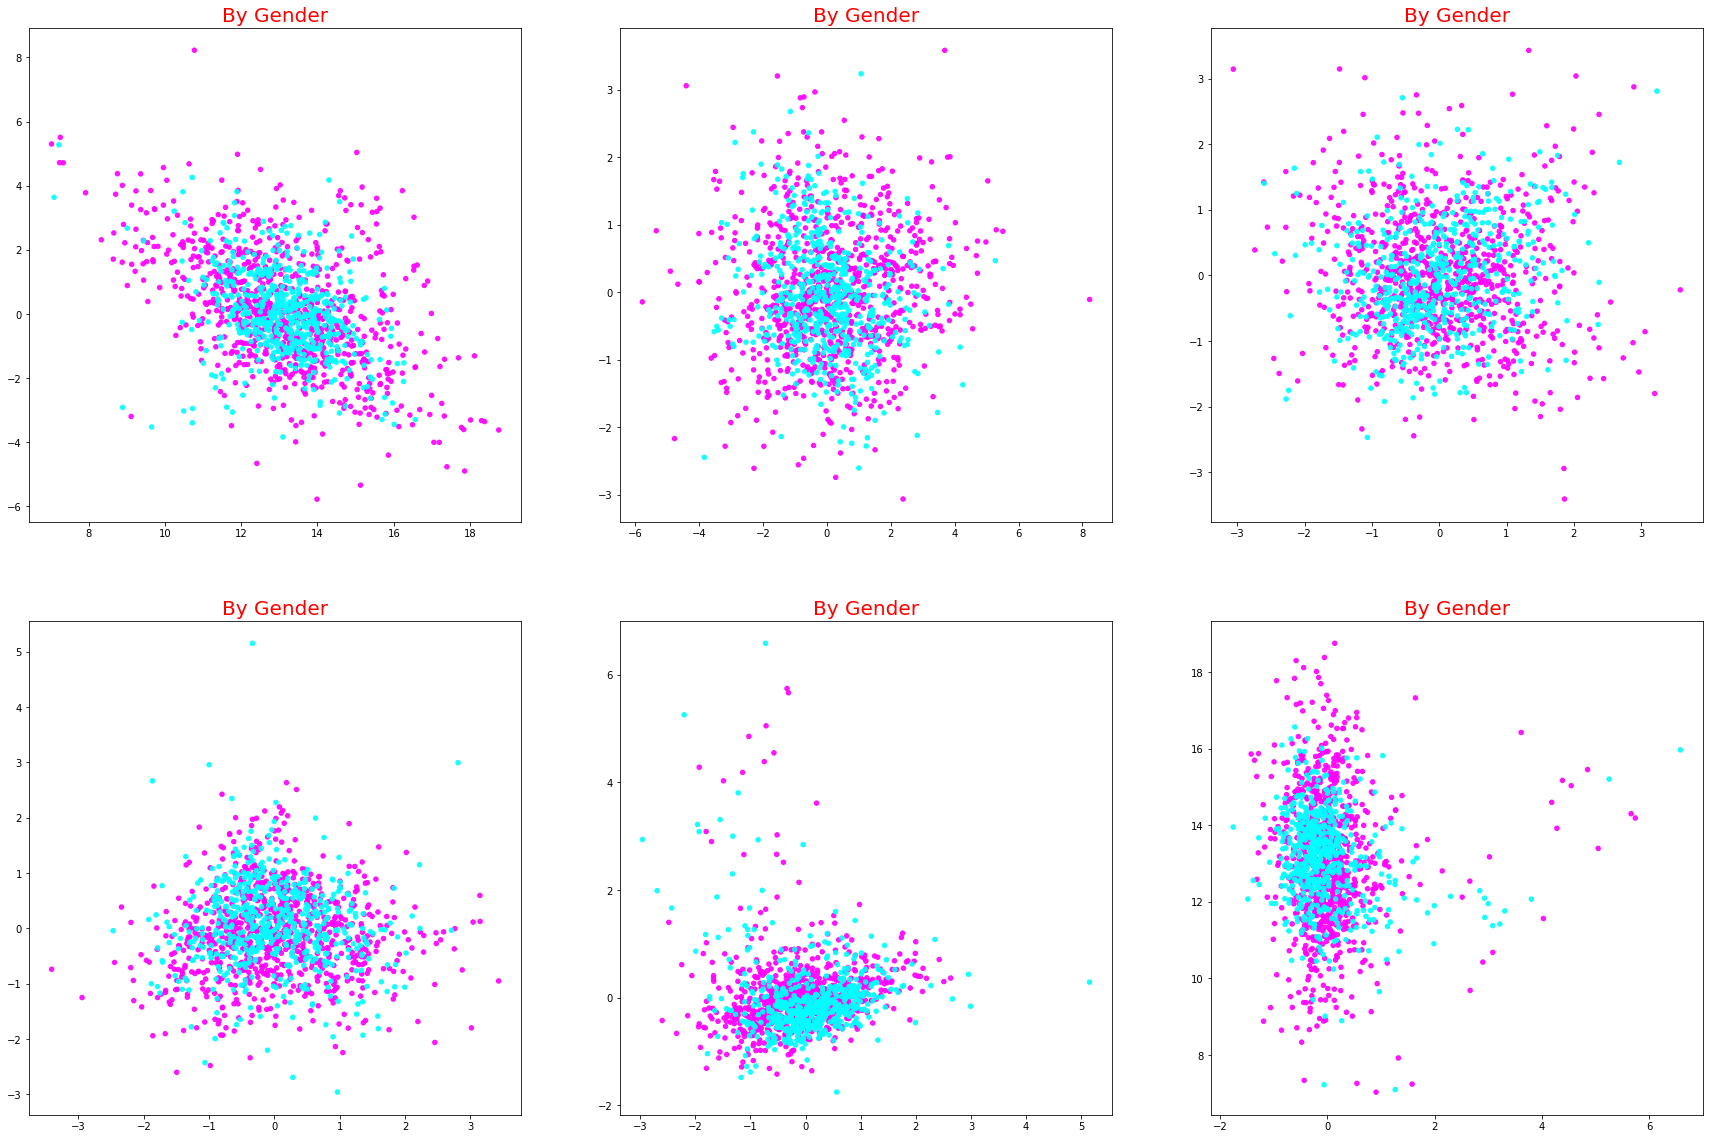

In [6]:
import matplotlib as mpl
#mpl.style.use('default')
mpl.rcParams['image.cmap'] = 'cool'  #zero is cyan, one is pink

start = 0
plot_all_dimensions(clips_dr[:,start:start+6], clips["gender"]=="M", "By Gender")

### PCA

In [5]:
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
pca = PCA(n_components=9, random_state=3)
clips_pca = pca.fit_transform(clips.iloc[:,6:])
print(pca.explained_variance_ratio_.sum())

0.5143296664233068


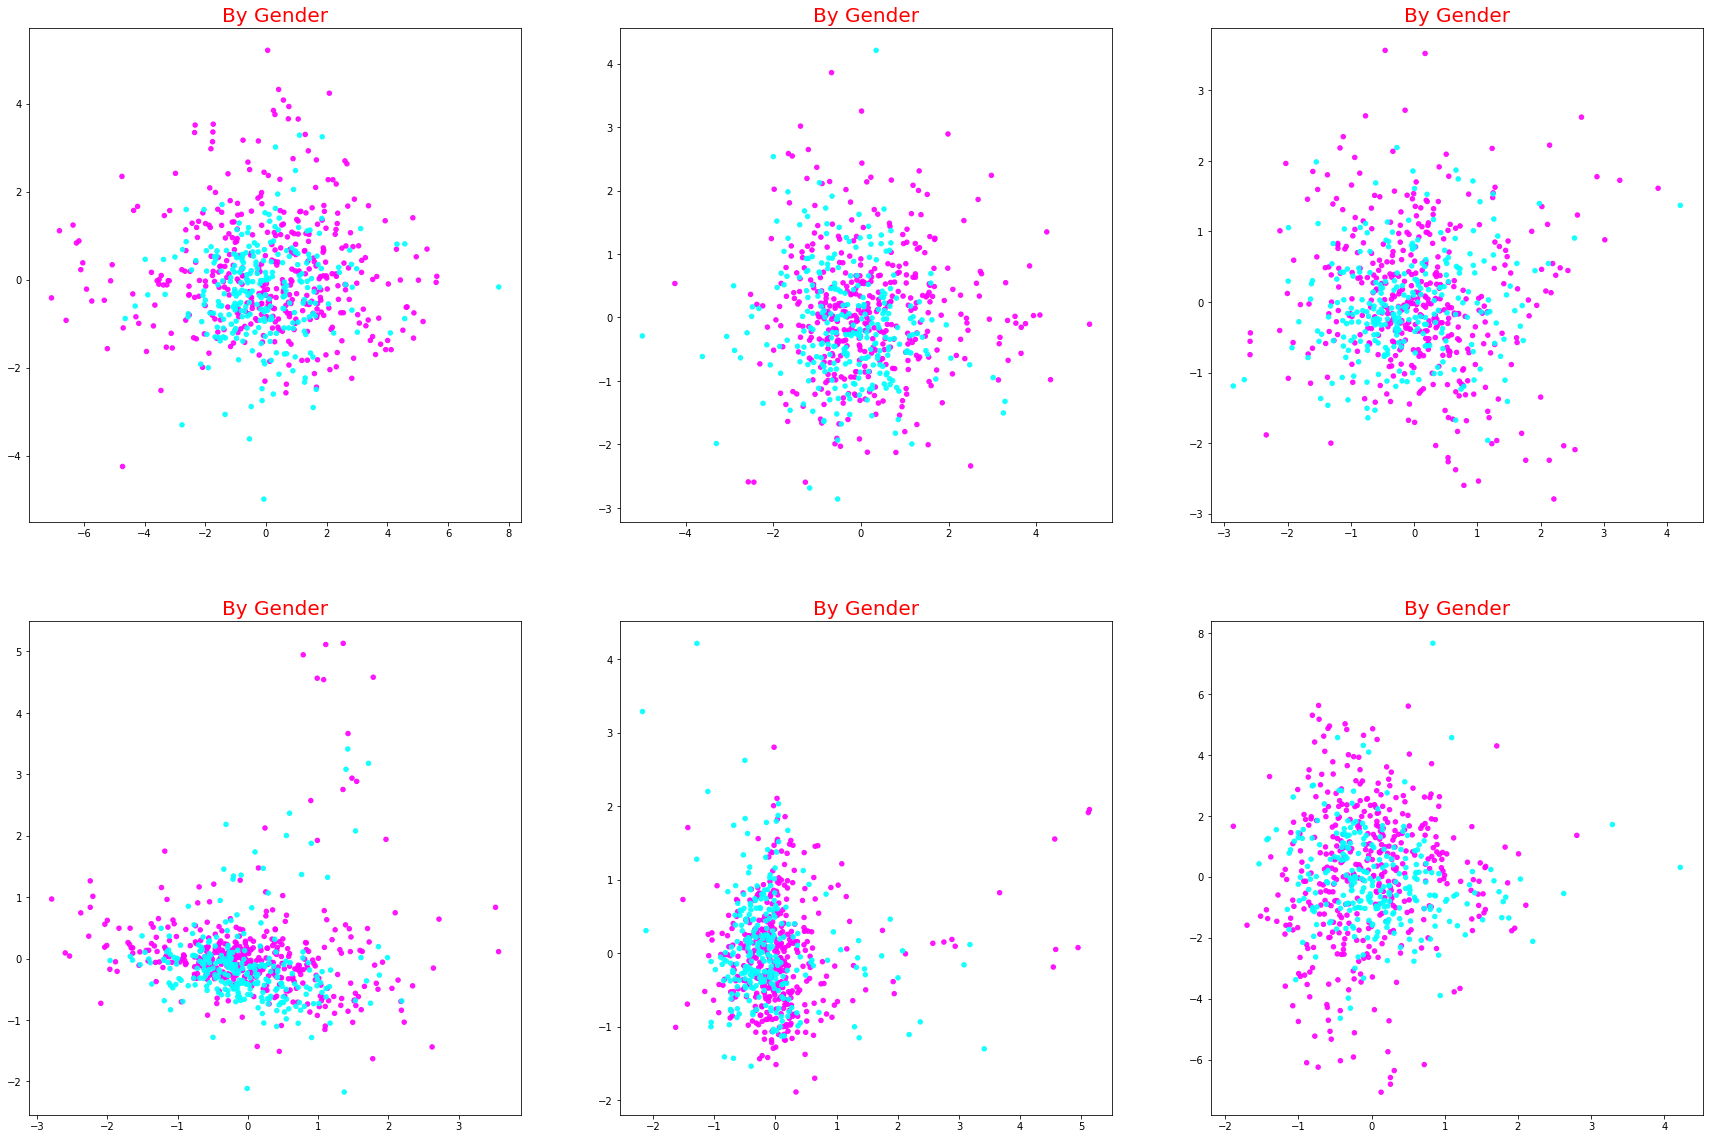

In [7]:
import matplotlib as mpl
#mpl.style.use('default')
mpl.rcParams['image.cmap'] = 'cool'  #zero is cyan, one is pink

start =0
plot_all_dimensions(clips_pca[:,start:start+6], clips["gender"]=="M", "By Gender")

### NMF

In [13]:
nmf = NMF(n_components=12, random_state=3)
non_negClips = (clips.iloc[:,6:]).to_numpy()
non_negClips[non_negClips<0] = 100
clips_nmf = nmf.fit_transform(non_negClips)

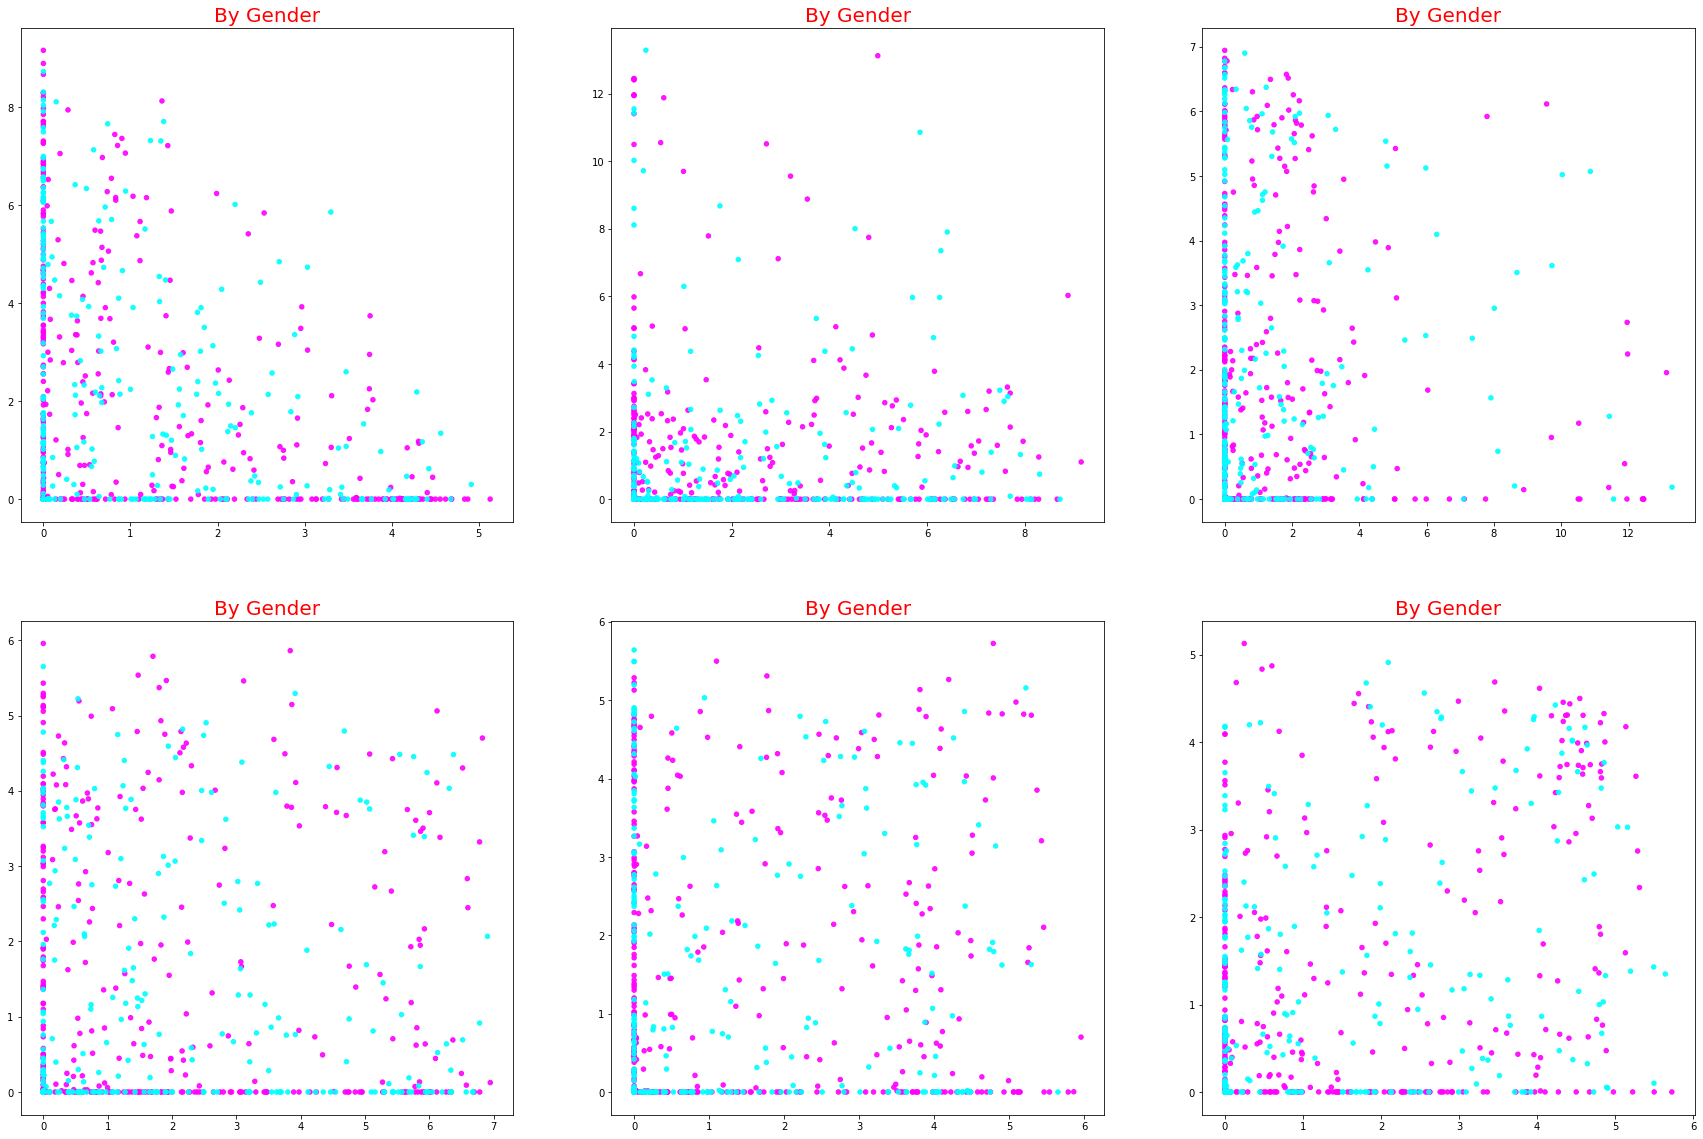

In [14]:
start =0
plot_all_dimensions(clips_nmf[:,start:start+6],(clips["gender"]=="M"), "By Gender")

### LSA - w/ neg number treatment

In [15]:
non_negClips = (clips.iloc[:,6:]).to_numpy()
non_negClips[non_negClips<0] = 0

svd2 = TruncatedSVD(n_components=9, n_iter=20, random_state=3)
clips_svd2 = svd2.fit_transform(non_negClips)
print(svd2.explained_variance_ratio_.sum())

0.5140907709429092


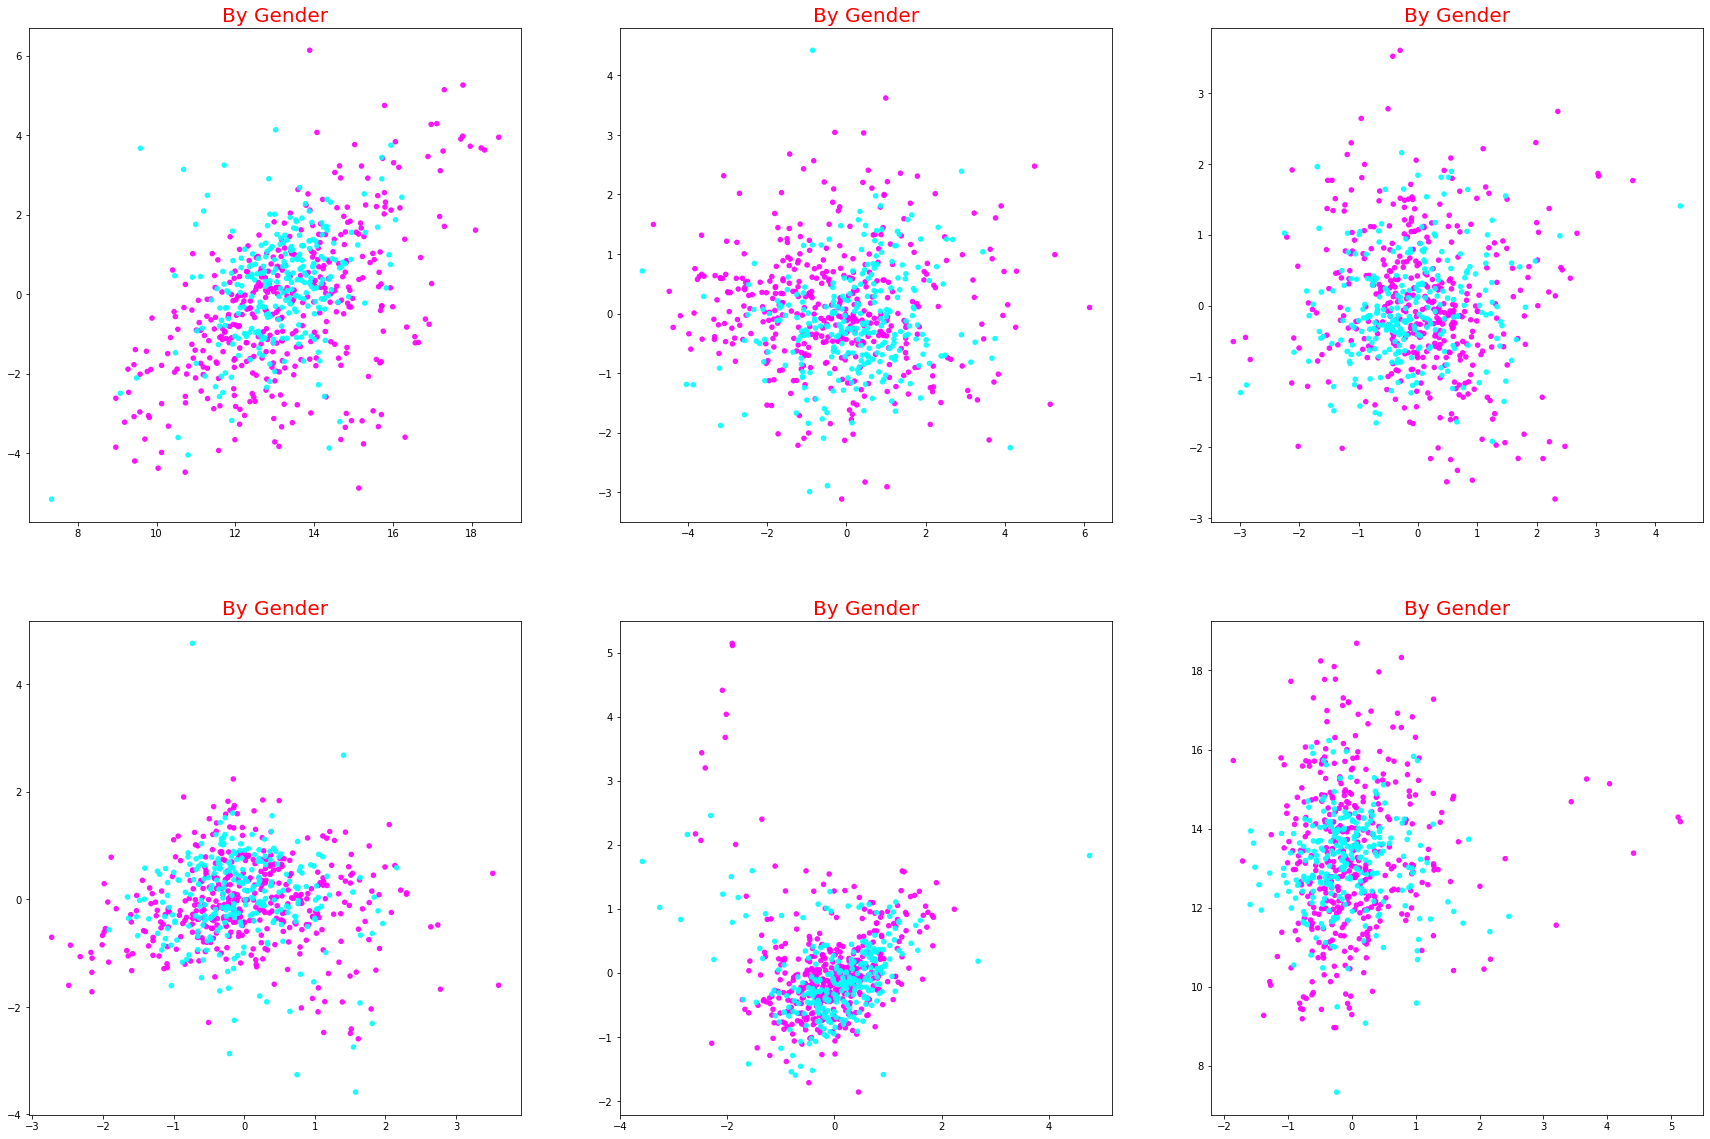

In [16]:
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'cool'

start = 0
plot_all_dimensions(clips_svd2[:,start:start+6], clips["gender"]=="M", "By Gender")

In [294]:
non_negClips.shape

(691, 864)

### Class for finding similar clips

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
import heapq

class simClips():
    """
    """
    def __init__(self, matrix, clips):
        """
        matrix is the dimensionality reduced matrix in numpy or lists format
        clips is the pandas dataframe of the data
        """
        self.matrix = np.array(matrix)
        self.obs = matrix.shape[0]
        self.features = matrix.shape[1]
        self.clips = clips
        
    
    def getSimilarN(self, row = None, N=9, dist_metric="cosine"):
        if row == None:
            sampled_row = np.random.randint(0, self.obs)
        else:
            sampled_row = row
        
        assert sampled_row <= self.obs
        
        center = self.matrix[sampled_row]
        
        if dist_metric == "cosine":
            dist = np.array([1-distance.cosine(row, center) for row in self.matrix])
            SimiarlNIndices = heapq.nlargest(N, range(len(dist)), dist.take)
        else:  #assumes euclidean
            dist = np.array([distance.euclidean(row, center) for row in self.matrix])
            SimiarlNIndices = heapq.nsmallest(N, range(len(dist)), dist.take)
            
        return SimiarlNIndices
    

    def getSimilarN_Poses(self, row = None, N=9, dist_metric="cosine"):
        """
        Rescaled to fit 640 X 360
        """
        sims_idx = self.getSimilarN(row = row, N=N, dist_metric=dist_metric)
        
        sims_clips = self.clips.iloc[sims_idx,6:].to_numpy()
        sims_clips = sims_clips.reshape((N, SLIDE, -1))
        
        sims_meta = self.clips.iloc[sims_idx,:6].to_numpy()
        
        #rescale
        for i in range(0, sims_clips.shape[2]):
            if i%2 == 0:
                sims_clips[:,:,i] = sims_clips[:,:,i] / xScale
            else:
                sims_clips[:,:,i] = sims_clips[:,:,i] / yScale
        
        return sims_meta, sims_clips
    

In [8]:
import cv2
import numpy as np
from IPython.display import Video, Image, display
vids_loc = "../data/vids/"

def poseDetectOnFrames(file_name, file_output, start_frame=0, end_frame=20, step=1):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
    #---
    count = 0
    success = True
    while success:
        success,image = cap.read()
        if count > start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            img1 = getPoseImage(image)
            #cv2.line(img1, (160, 180), (480, 180), [0,0,0], 3, cv2.LINE_AA)
            out.write(img1)
        if count>end_frame:
            break
        count += 1
    print(f"count is: {count}")
    cap.release()
    out.release()

def getFrames(file_name, file_output, start_frame=0, end_frame=20, step=1):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    images = []
    
    #---
    #fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    #out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
    #---
    count = 0
    success = True
    while success:
        success,image = cap.read()
        if count >= start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            #img1 = getPoseImage(image)
            #cv2.line(img1, (160, 180), (480, 180), [0,0,0], 3, cv2.LINE_AA)
            #out.write(img1)
            images.append(image)
        if count>end_frame:
            break
        count += 1
    #print(f"count is: {count}")
    cap.release()
    #out.release()
    
    return images

def getSimilarVideoClipImages(list_of_video_clips):
    #clips = len(list_of_video_clips)
    imgs = [] # This is a No of Clips X time steps X Images (W X H X Channels)
    
    for vd_clips in list_of_video_clips:
        #print(f"{vd_clips[0]} - {vd_clips[1]} to {vd_clips[2]}  ")
        temp_imgs = getFrames(vids_loc+vd_clips[0], "doesNotMatter", start_frame=vd_clips[1], end_frame=vd_clips[2])
        imgs.append(temp_imgs)
    
    return imgs

def similar9ClipsVideo(sim_clip_images, file_output):
    """
    """
    sim_clip_images = np.array(sim_clip_images)
    t_steps = sim_clip_images.shape[1]
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (3*640,  3*360))
    
    #---
    for t in range(0, t_steps):
        imgs_at_t = sim_clip_images[:,t,...]
        t1 = np.concatenate((imgs_at_t[0,...], imgs_at_t[1,...], imgs_at_t[2,...]), axis = 1)
        t2 = np.concatenate((imgs_at_t[3,...], imgs_at_t[4,...], imgs_at_t[5,...]), axis = 1)
        t3 = np.concatenate((imgs_at_t[6,...], imgs_at_t[7,...], imgs_at_t[8,...]), axis = 1)

        f = np.concatenate((t1, t2, t3), axis=0)
        out.write(f)
    out.release()

In [9]:
import itertools

def plot_salsa_grid(grid_clips, fileout=""):
    """
    grid_clips is a N x frames X 36 numpy array
    """
    N = grid_clips[1].shape[0]
    no_of_frames = grid_clips[1].shape[1]
    meta = grid_clips[0]
    
    plt.rcParams['figure.figsize'] = [30, 20]                              
    fig, axs = plt.subplots(3, 3)
    #ax = plt.axes(xlim=(0, 640), ylim=(0, 360))
                              
    def animate(i):
        iters = list(itertools.product(range(0, 3), range(0, 3)))
        for idx, tup in enumerate(iters):
            axs[tup[0], tup[1]].clear()
            pose = grid_clips[1][idx][i].reshape((-1, 2))
            
            #print(pose)
            imgArray = np.ones((360, 640))
            axs[tup[0], tup[1]].imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
            for pair in POSE_PAIRS_MOD:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (pose[pair[0]][0] != -1)
                valid_pt2 = (pose[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [pose[pair[0]][0], pose[pair[1]][0]]
                    ys = [pose[pair[0]][1], pose[pair[1]][1]]
                    axs[tup[0], tup[1]].plot(xs, ys,'ko-', linewidth=1, markersize = 5)
            axs[tup[0], tup[1]].set_title(f"Performance: {meta[idx][1]}, frames {meta[idx][4]} to {meta[idx][5]}",
                                          fontsize=20, color='red')

    plt.tight_layout()
    anim = FuncAnimation(fig, animate, frames=no_of_frames, interval=125)
    #anim
    anim.save('../data/viz/test'+fileout+'.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


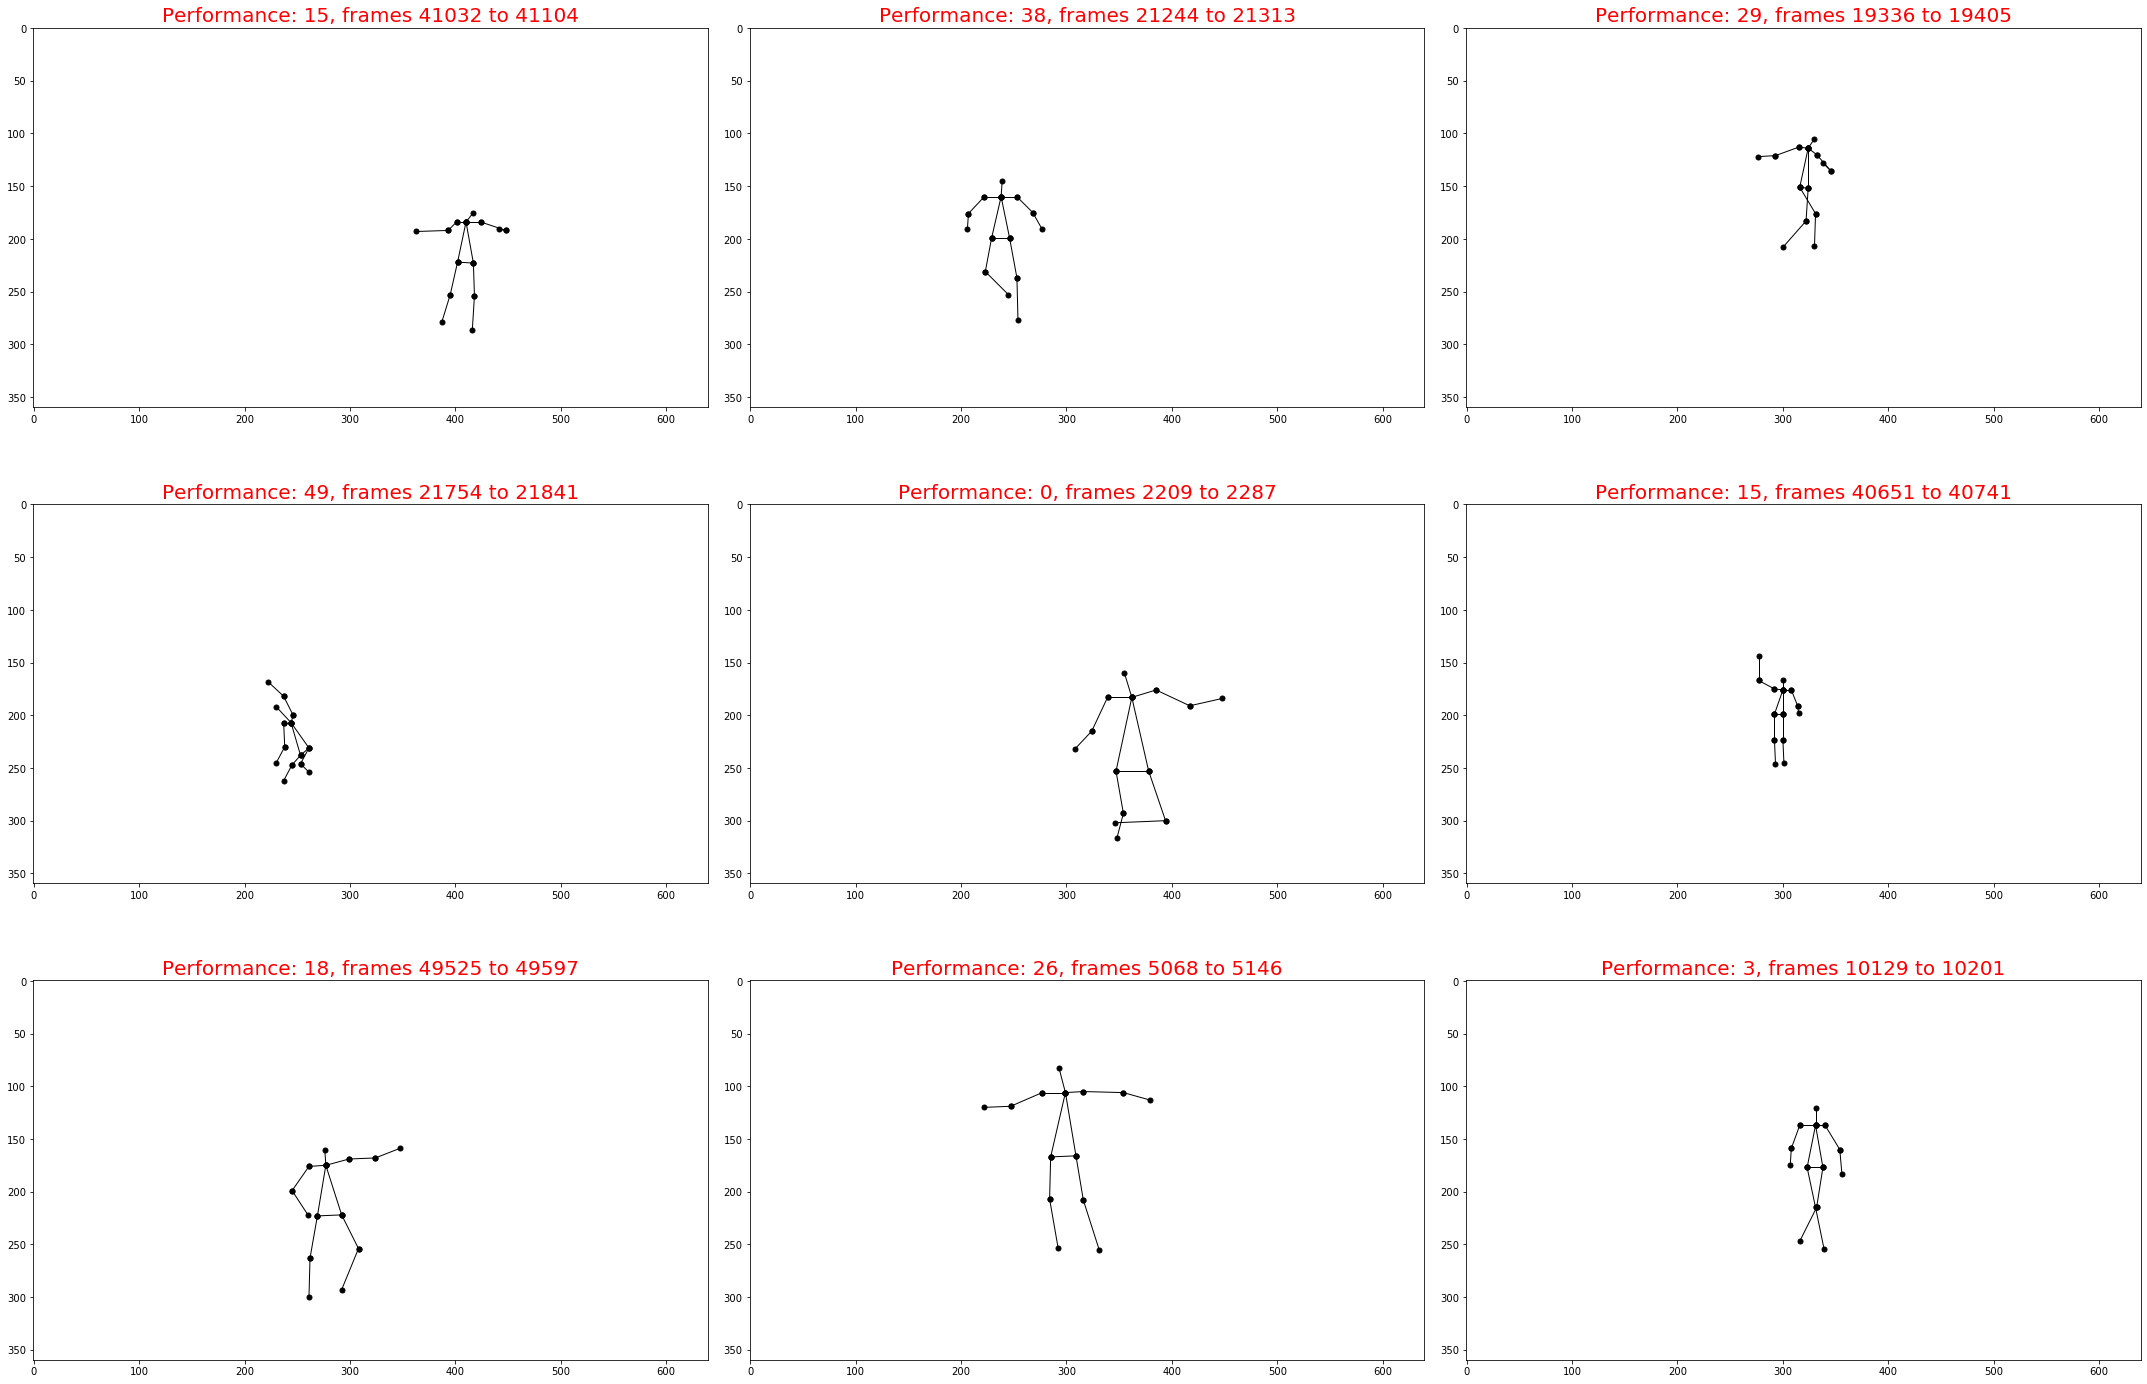

In [10]:
a = simClips(clips_dr, clips)
sim_clips = a.getSimilarN_Poses(dist_metric="cosine") #sim_clips is a tuple (sim_meta and sim_data)
plot_salsa_grid(sim_clips, "full_lsa_cos")
#print(sim_clips[0][3][2])

In [11]:
clips_vid = "../data/viz/full_lsa_cos_1"
frames_for_clips = list(sim_clips[0][:,3:])
frames_for_clips = [[f[0], f[1], f[1]+24*EVAL_TIME] for f in frames_for_clips]

sim_clip_images = getSimilarVideoClipImages(frames_for_clips)
similar9ClipsVideo(sim_clip_images, clips_vid)
Video(clips_vid+".mp4", width=640, height=360)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matpl

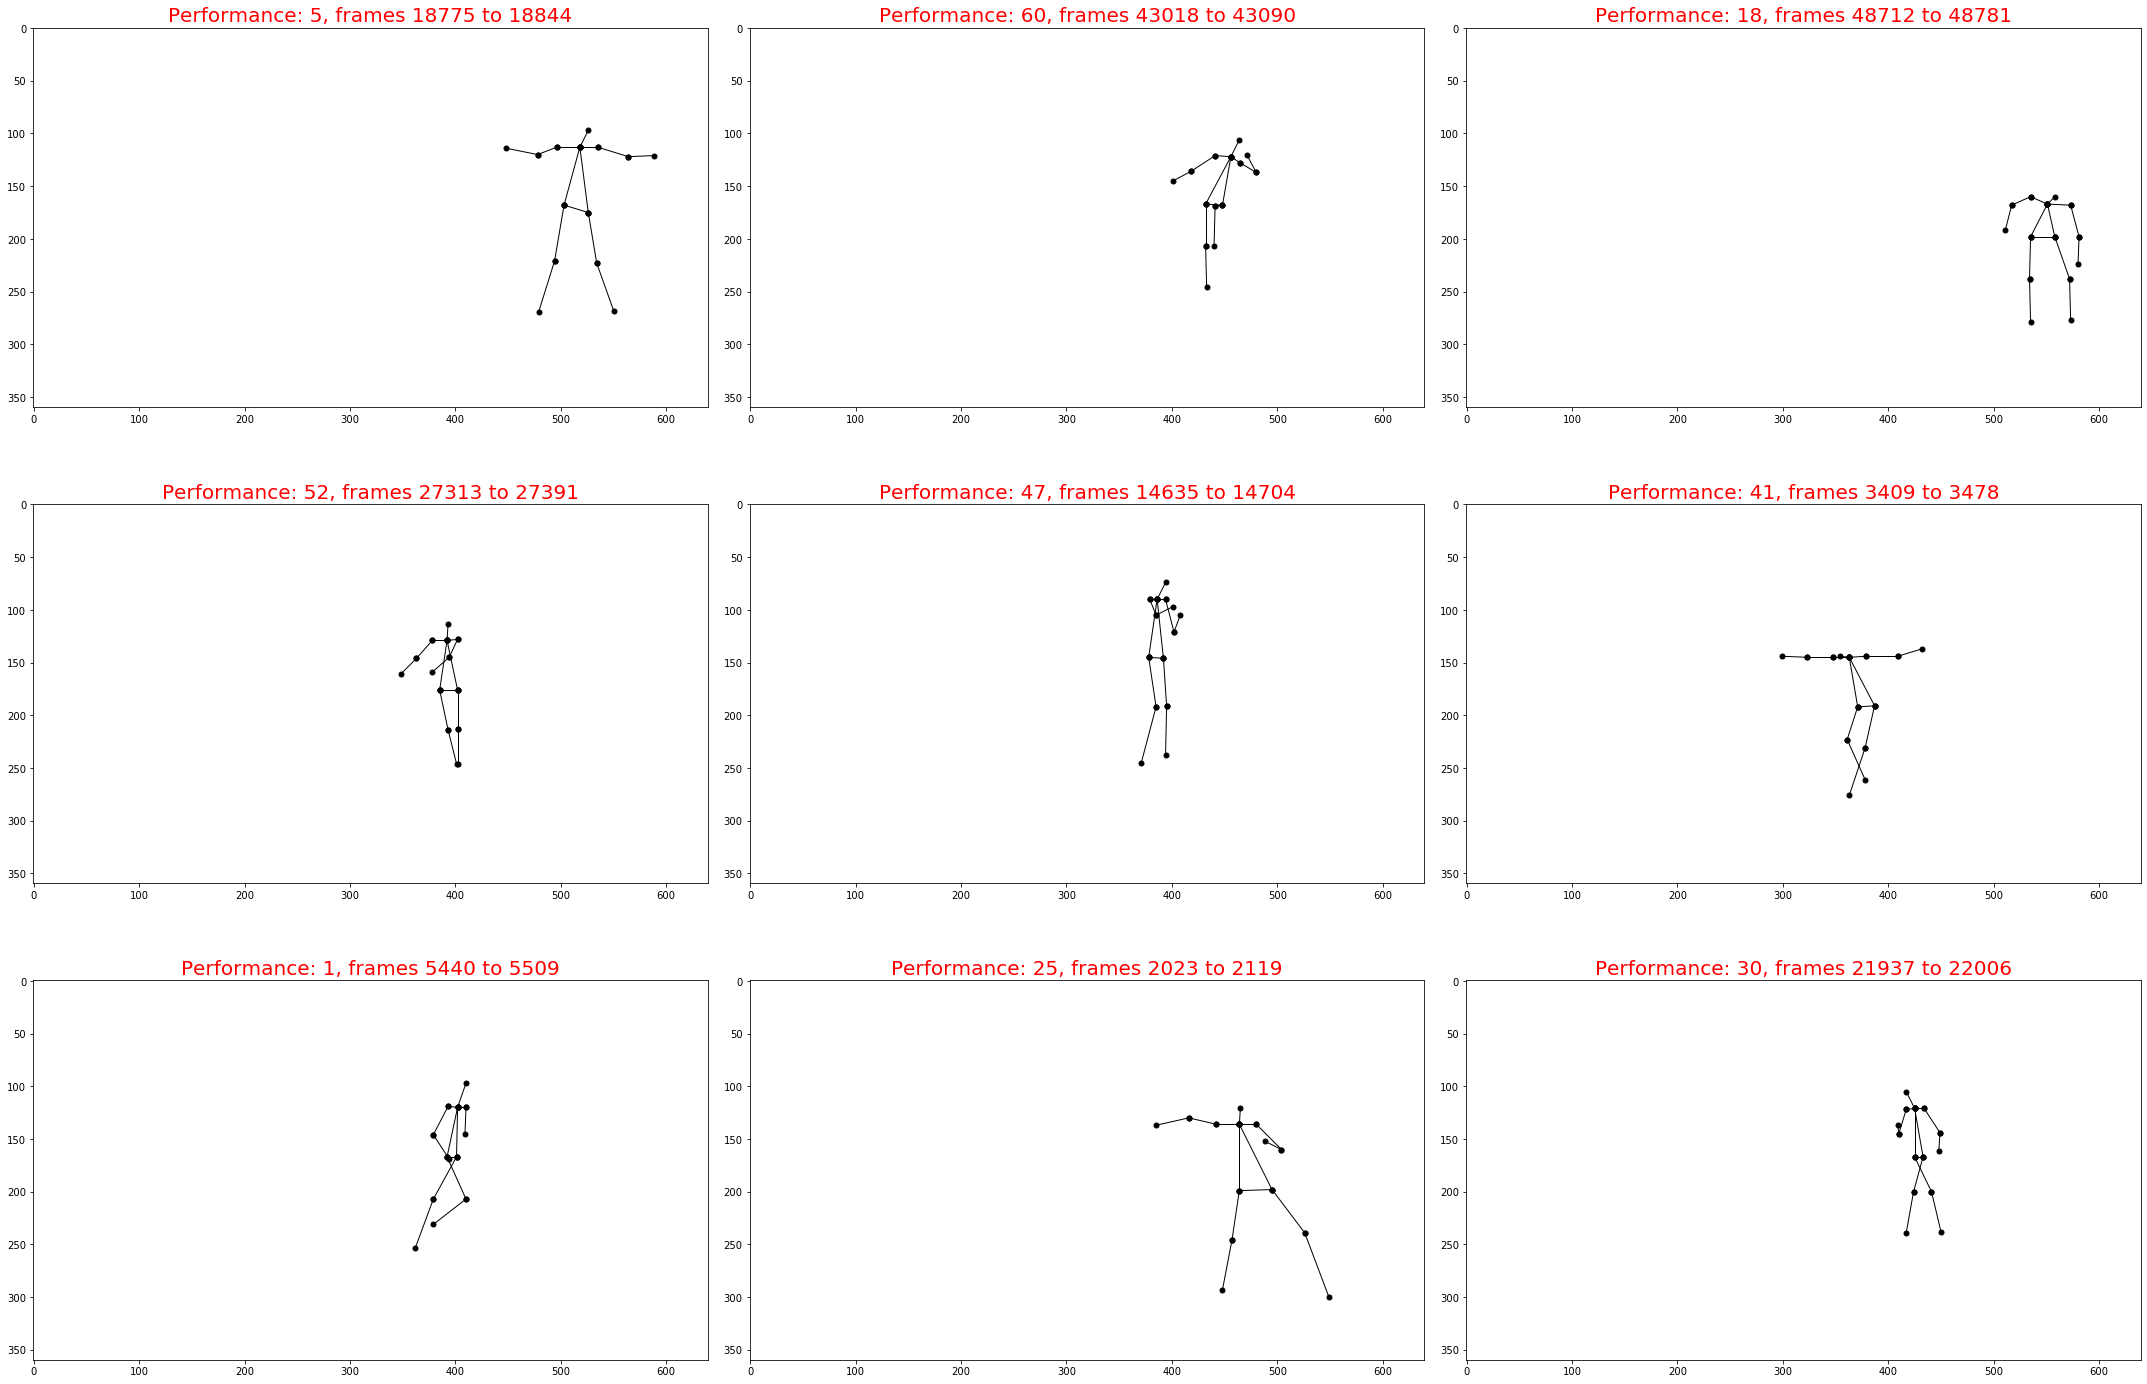

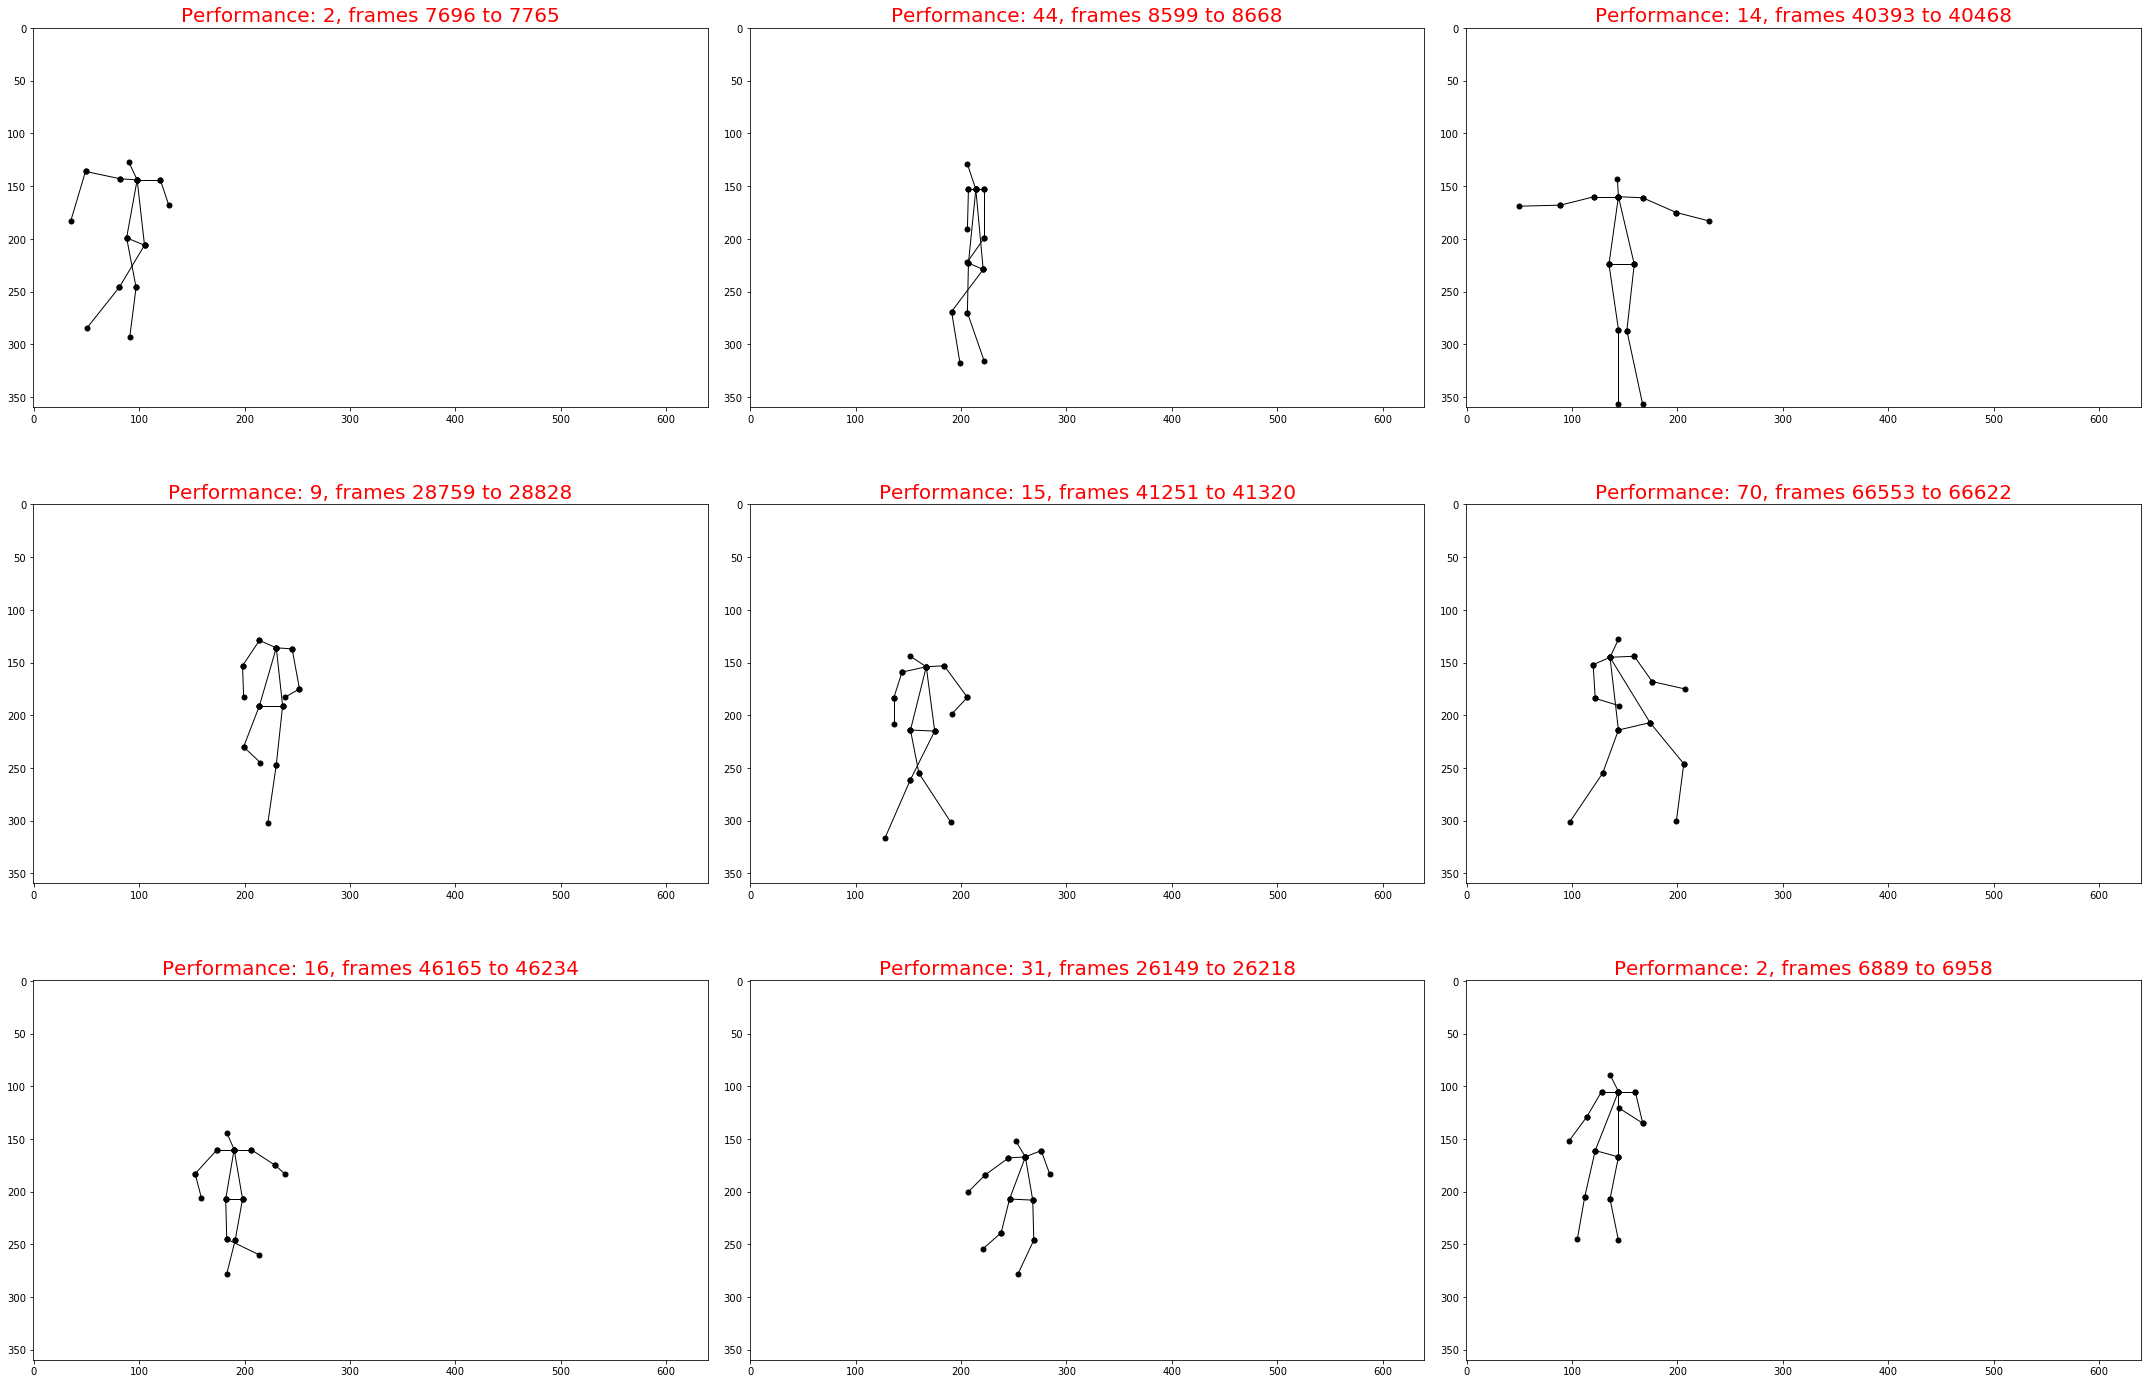

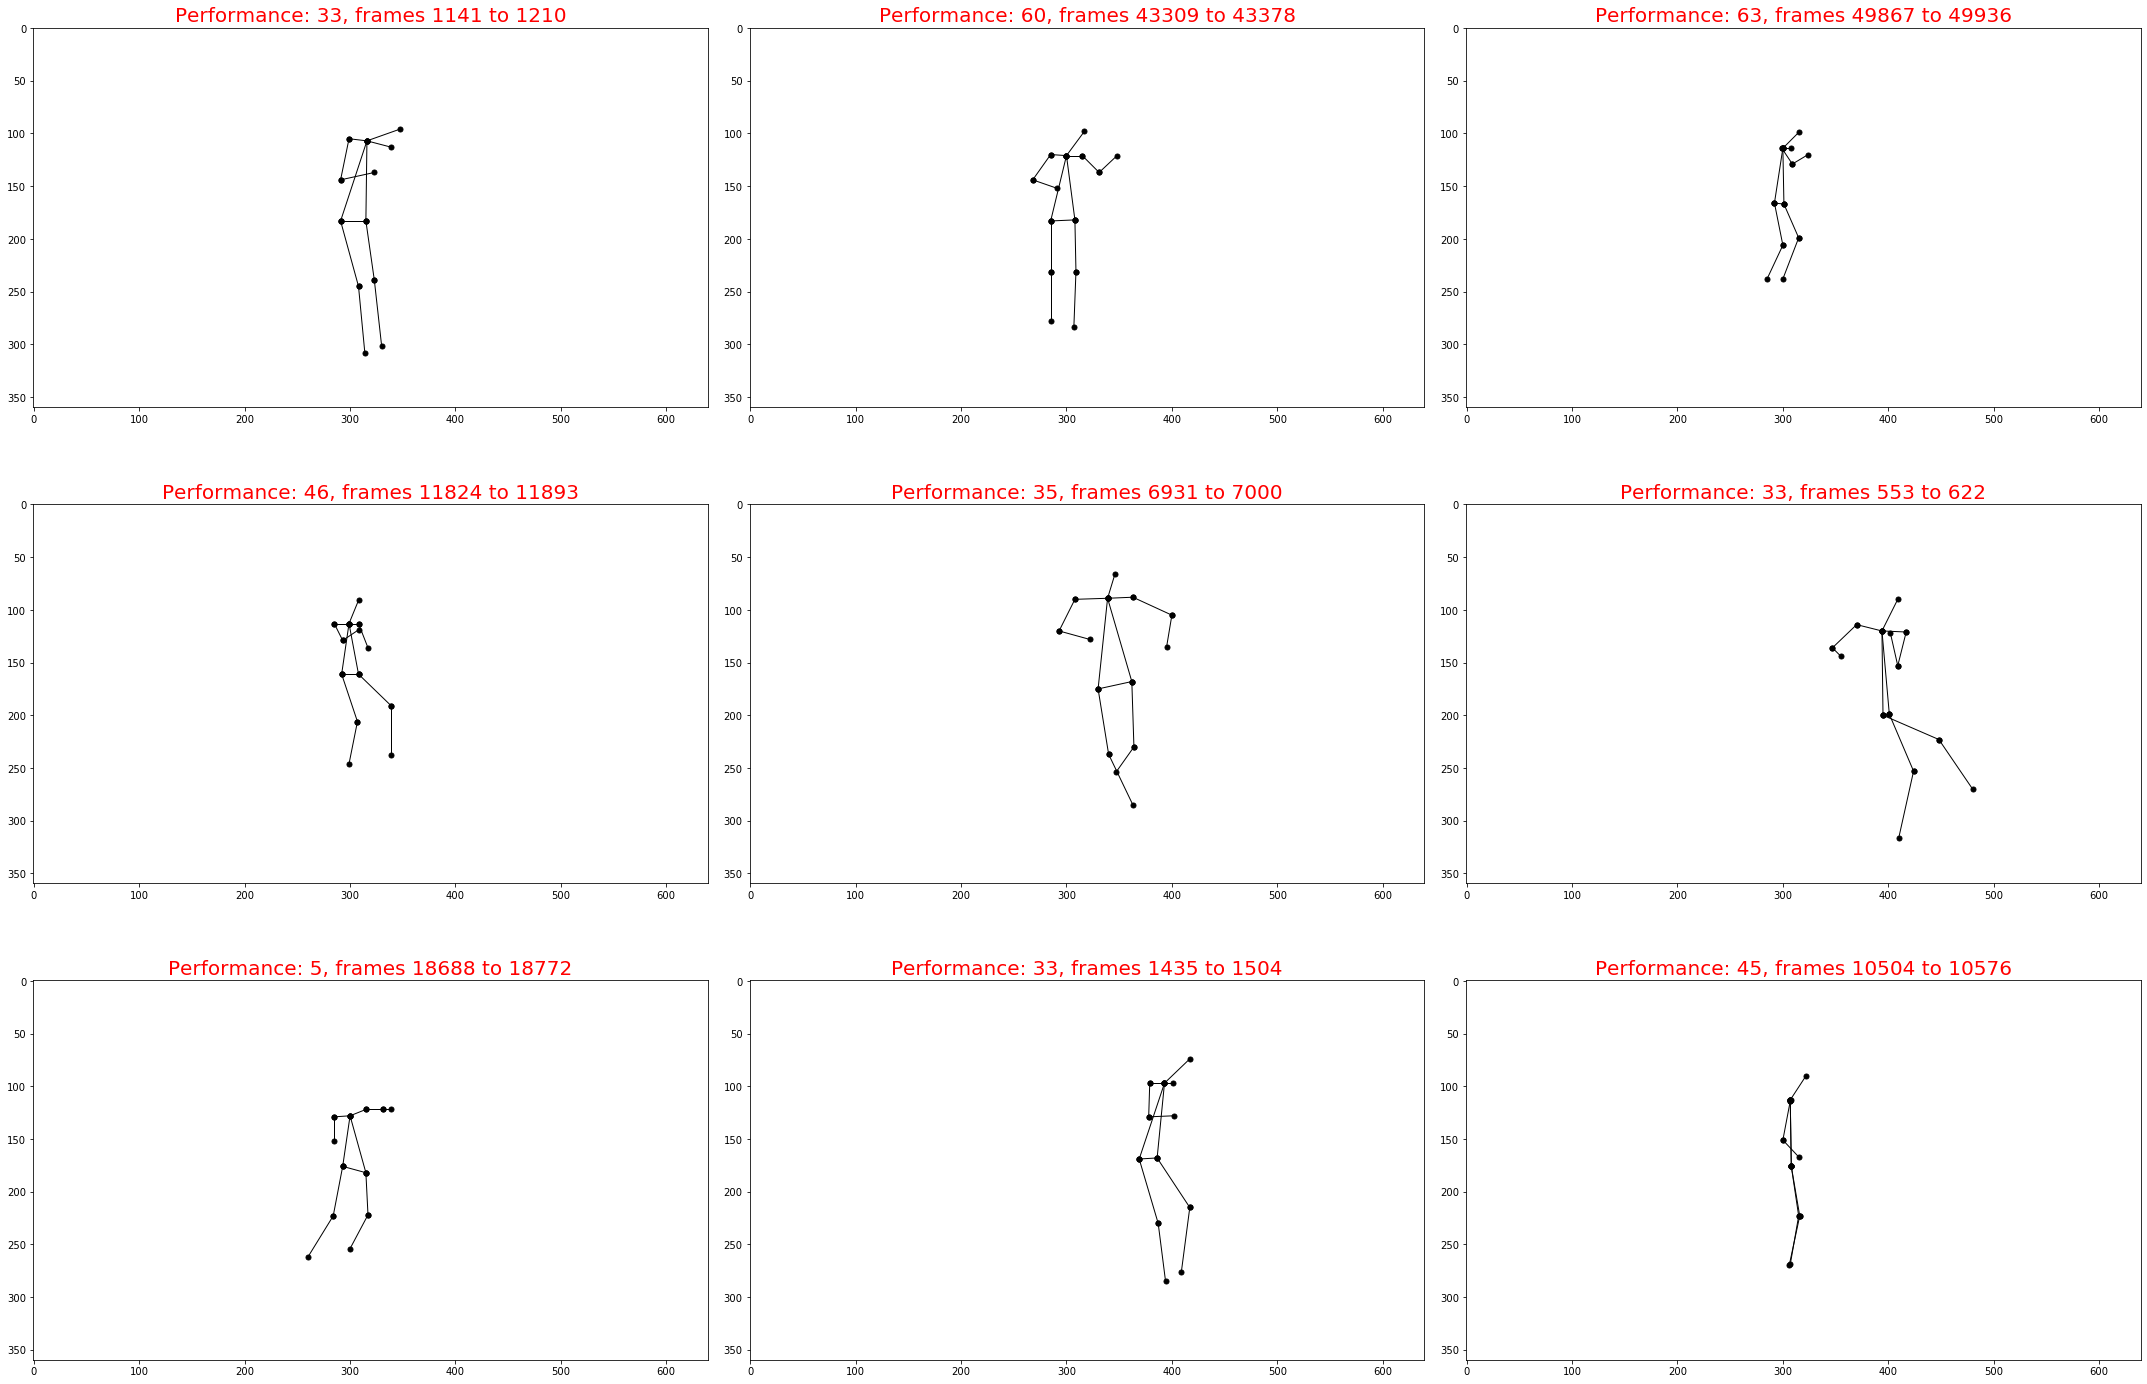

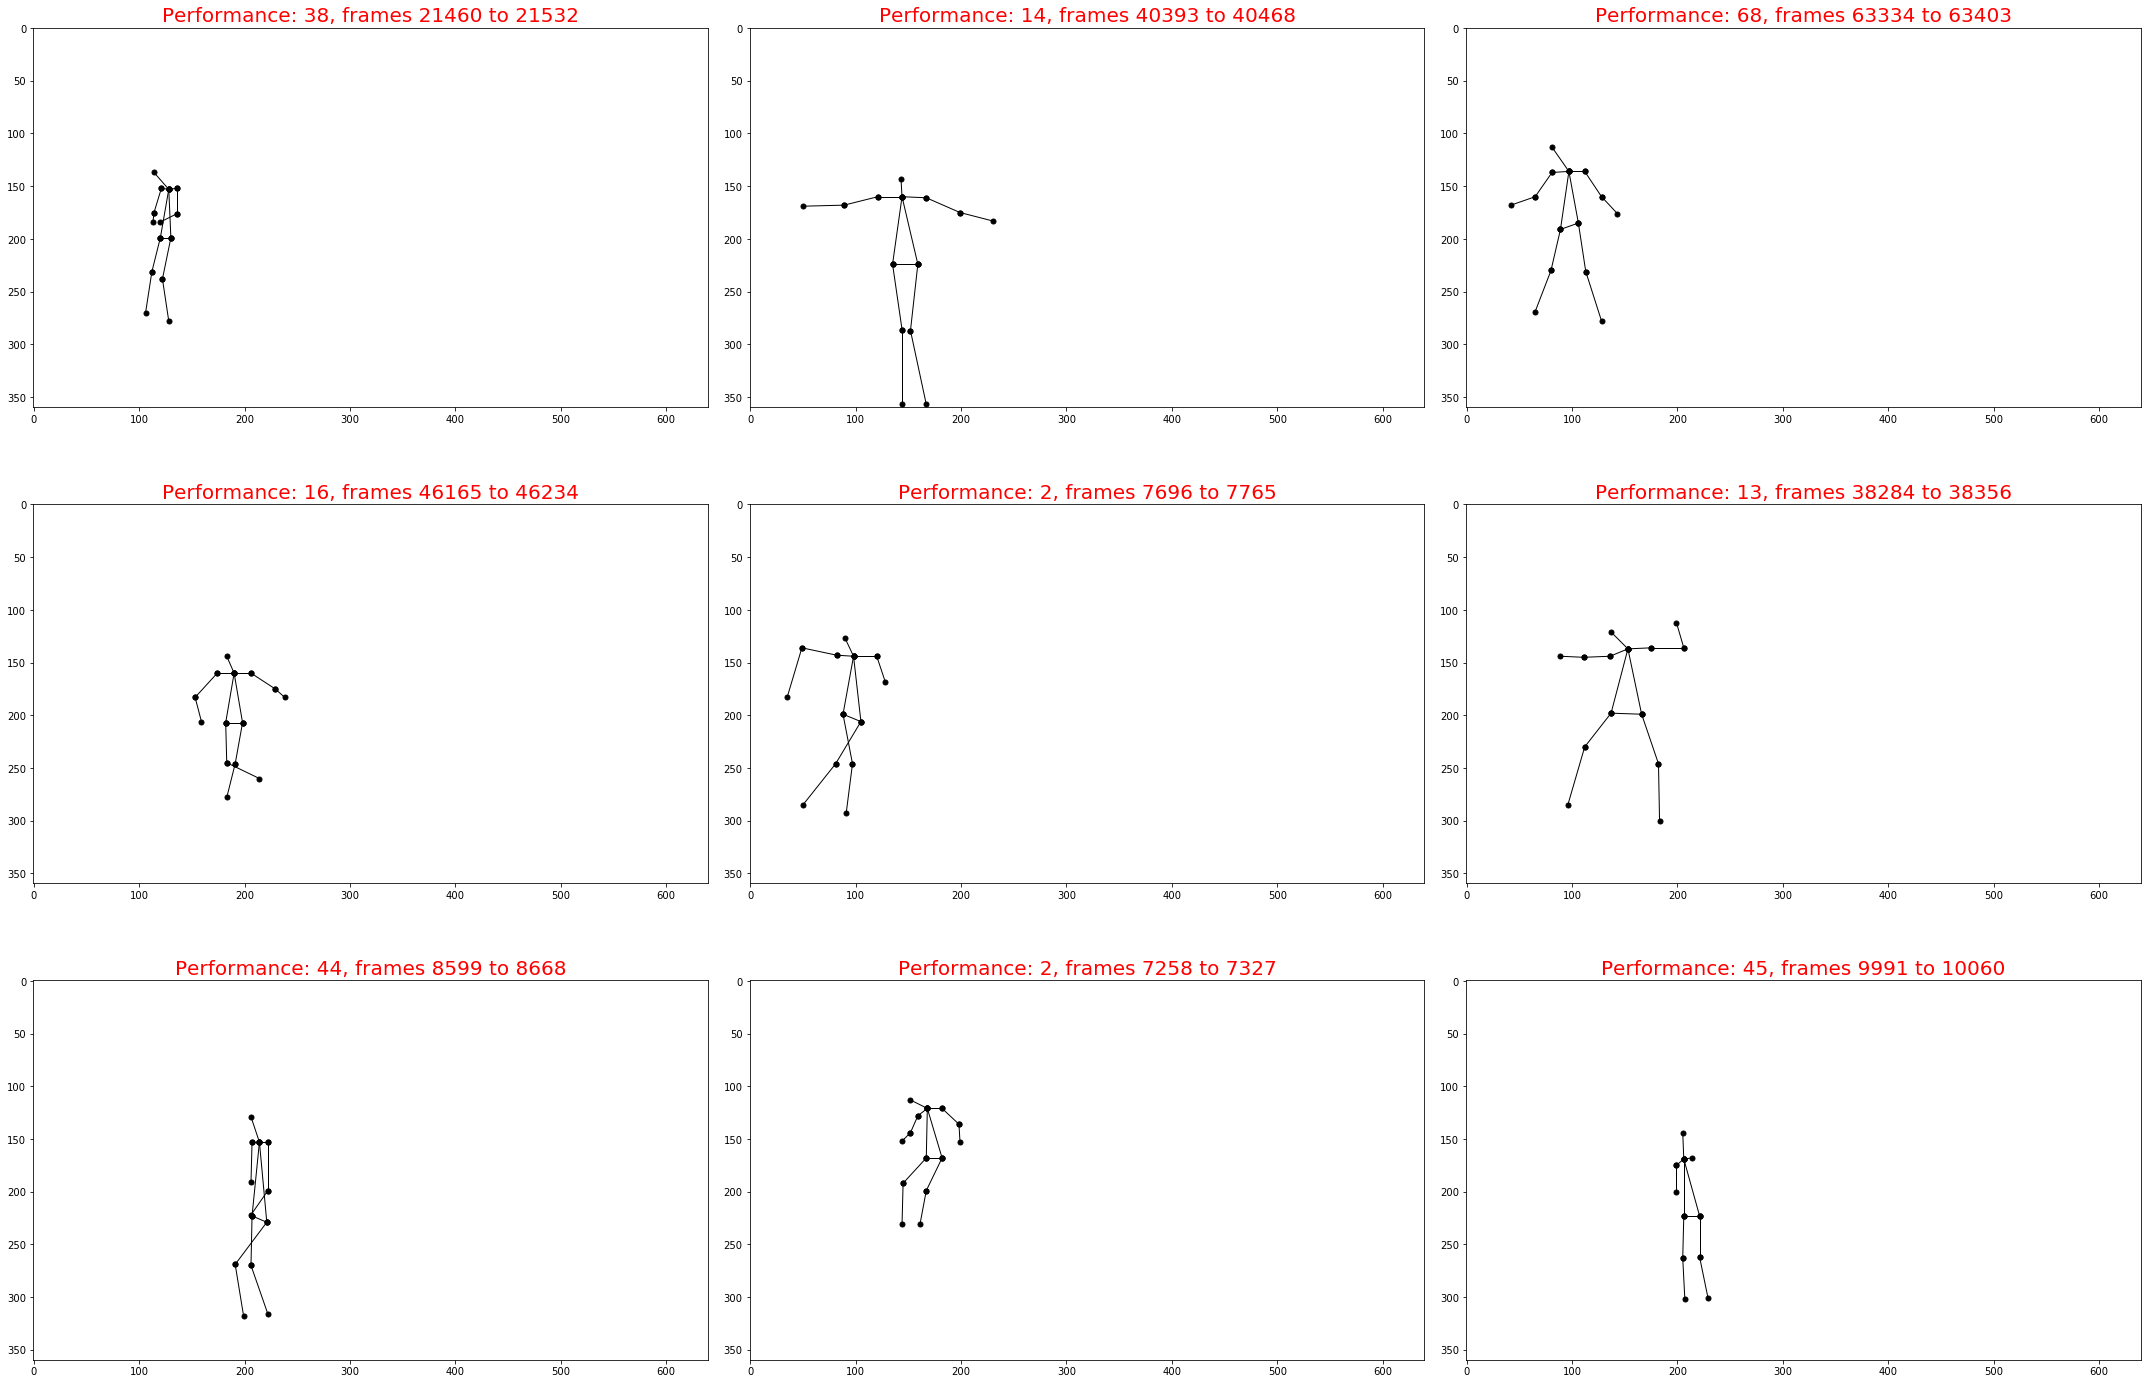

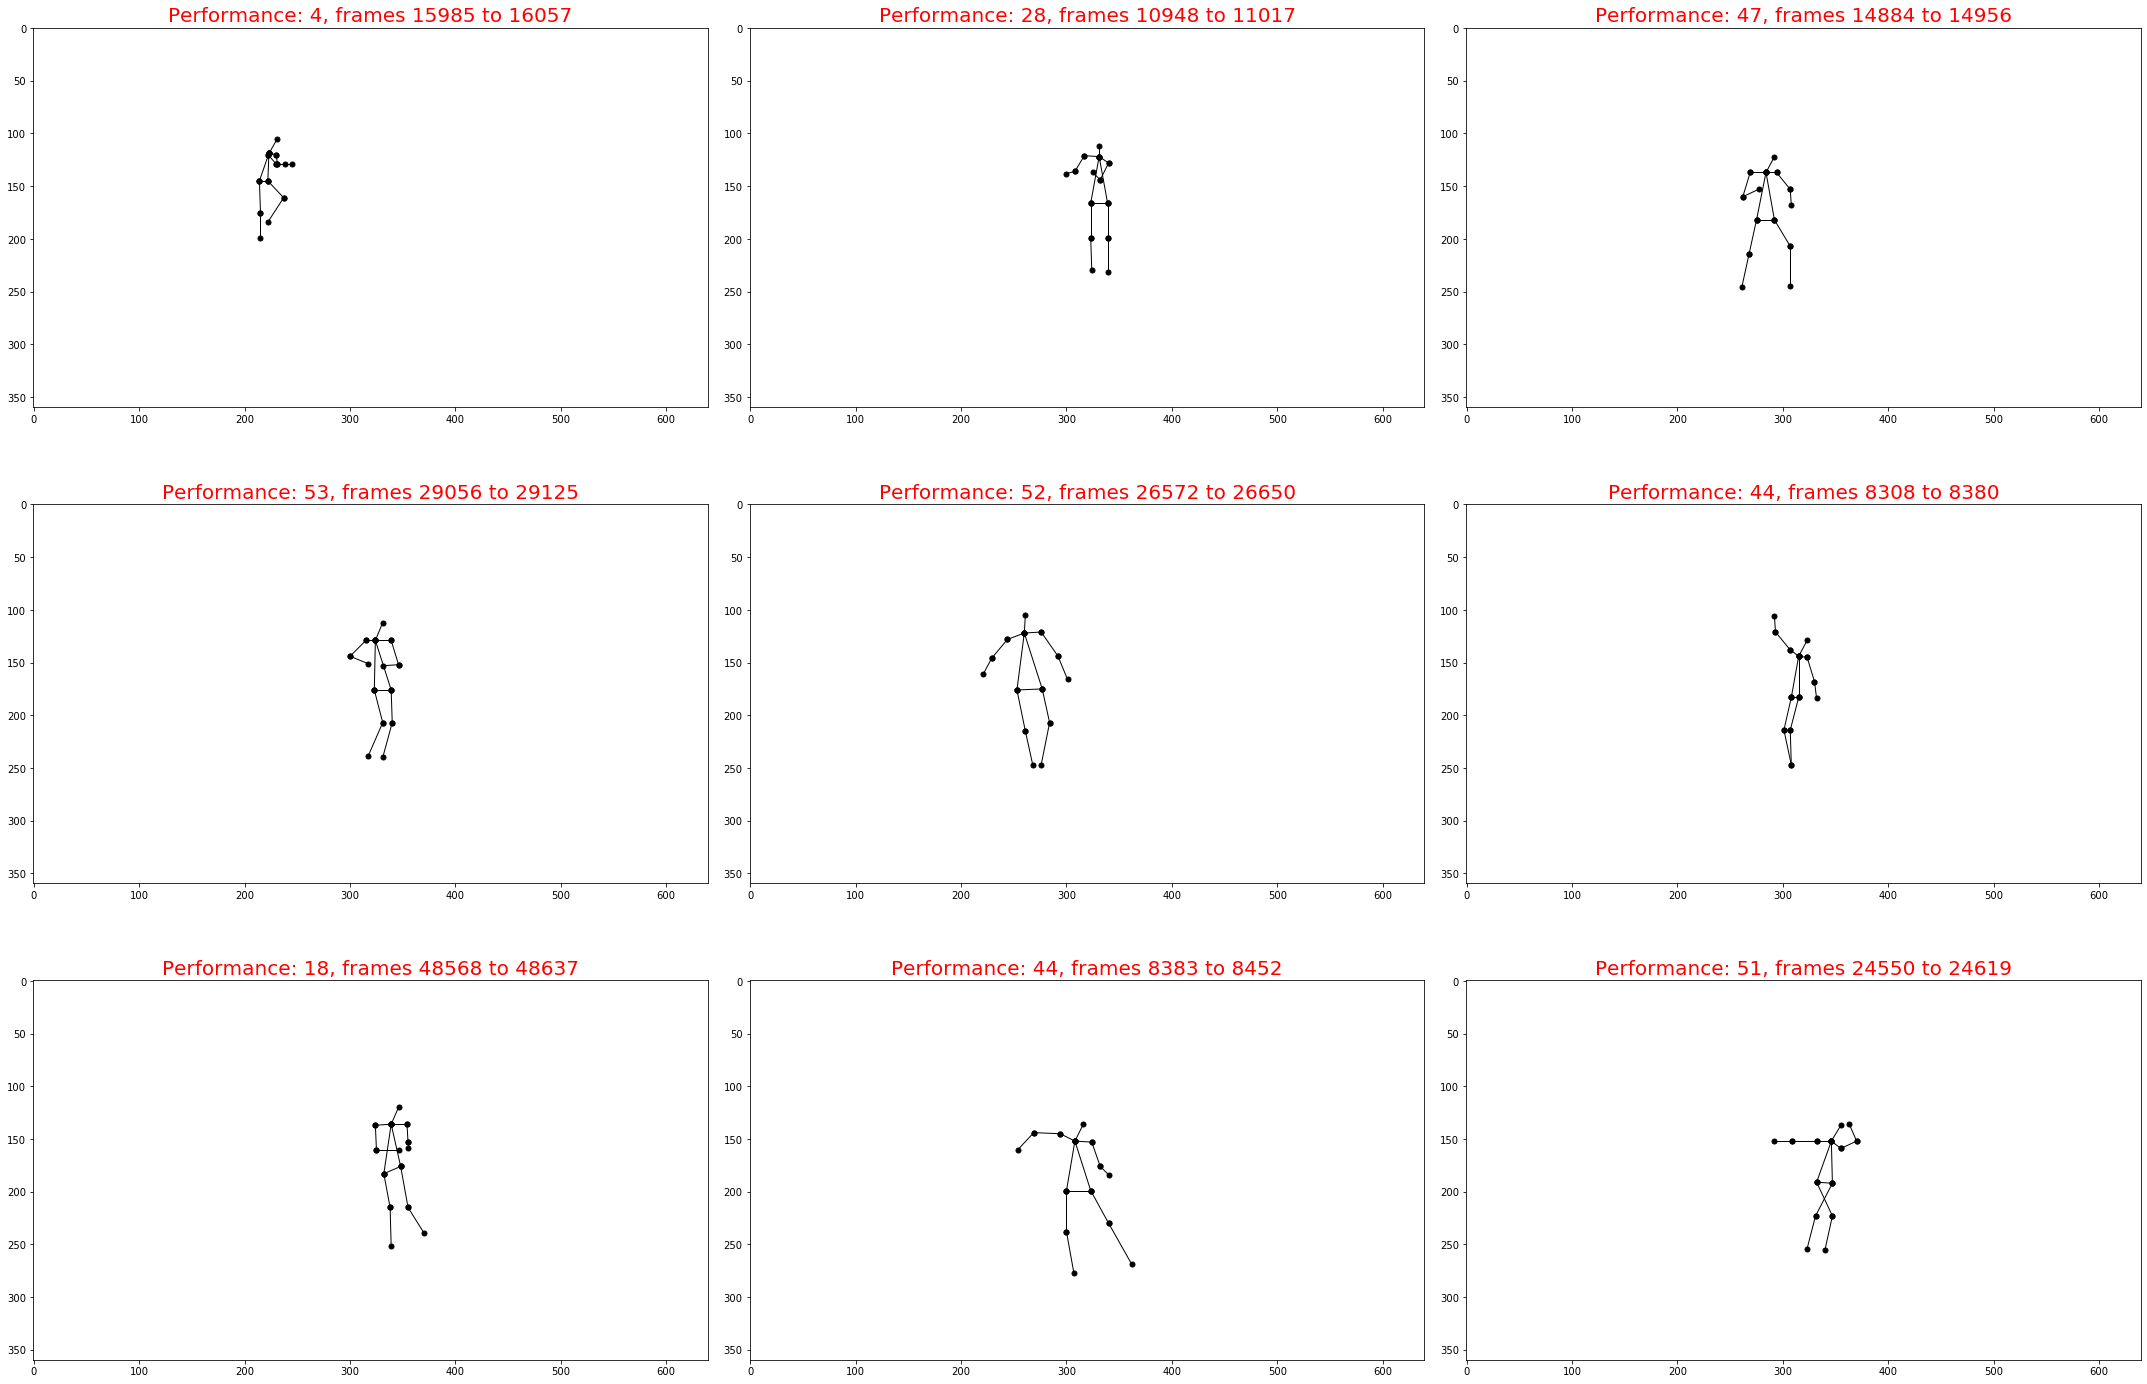

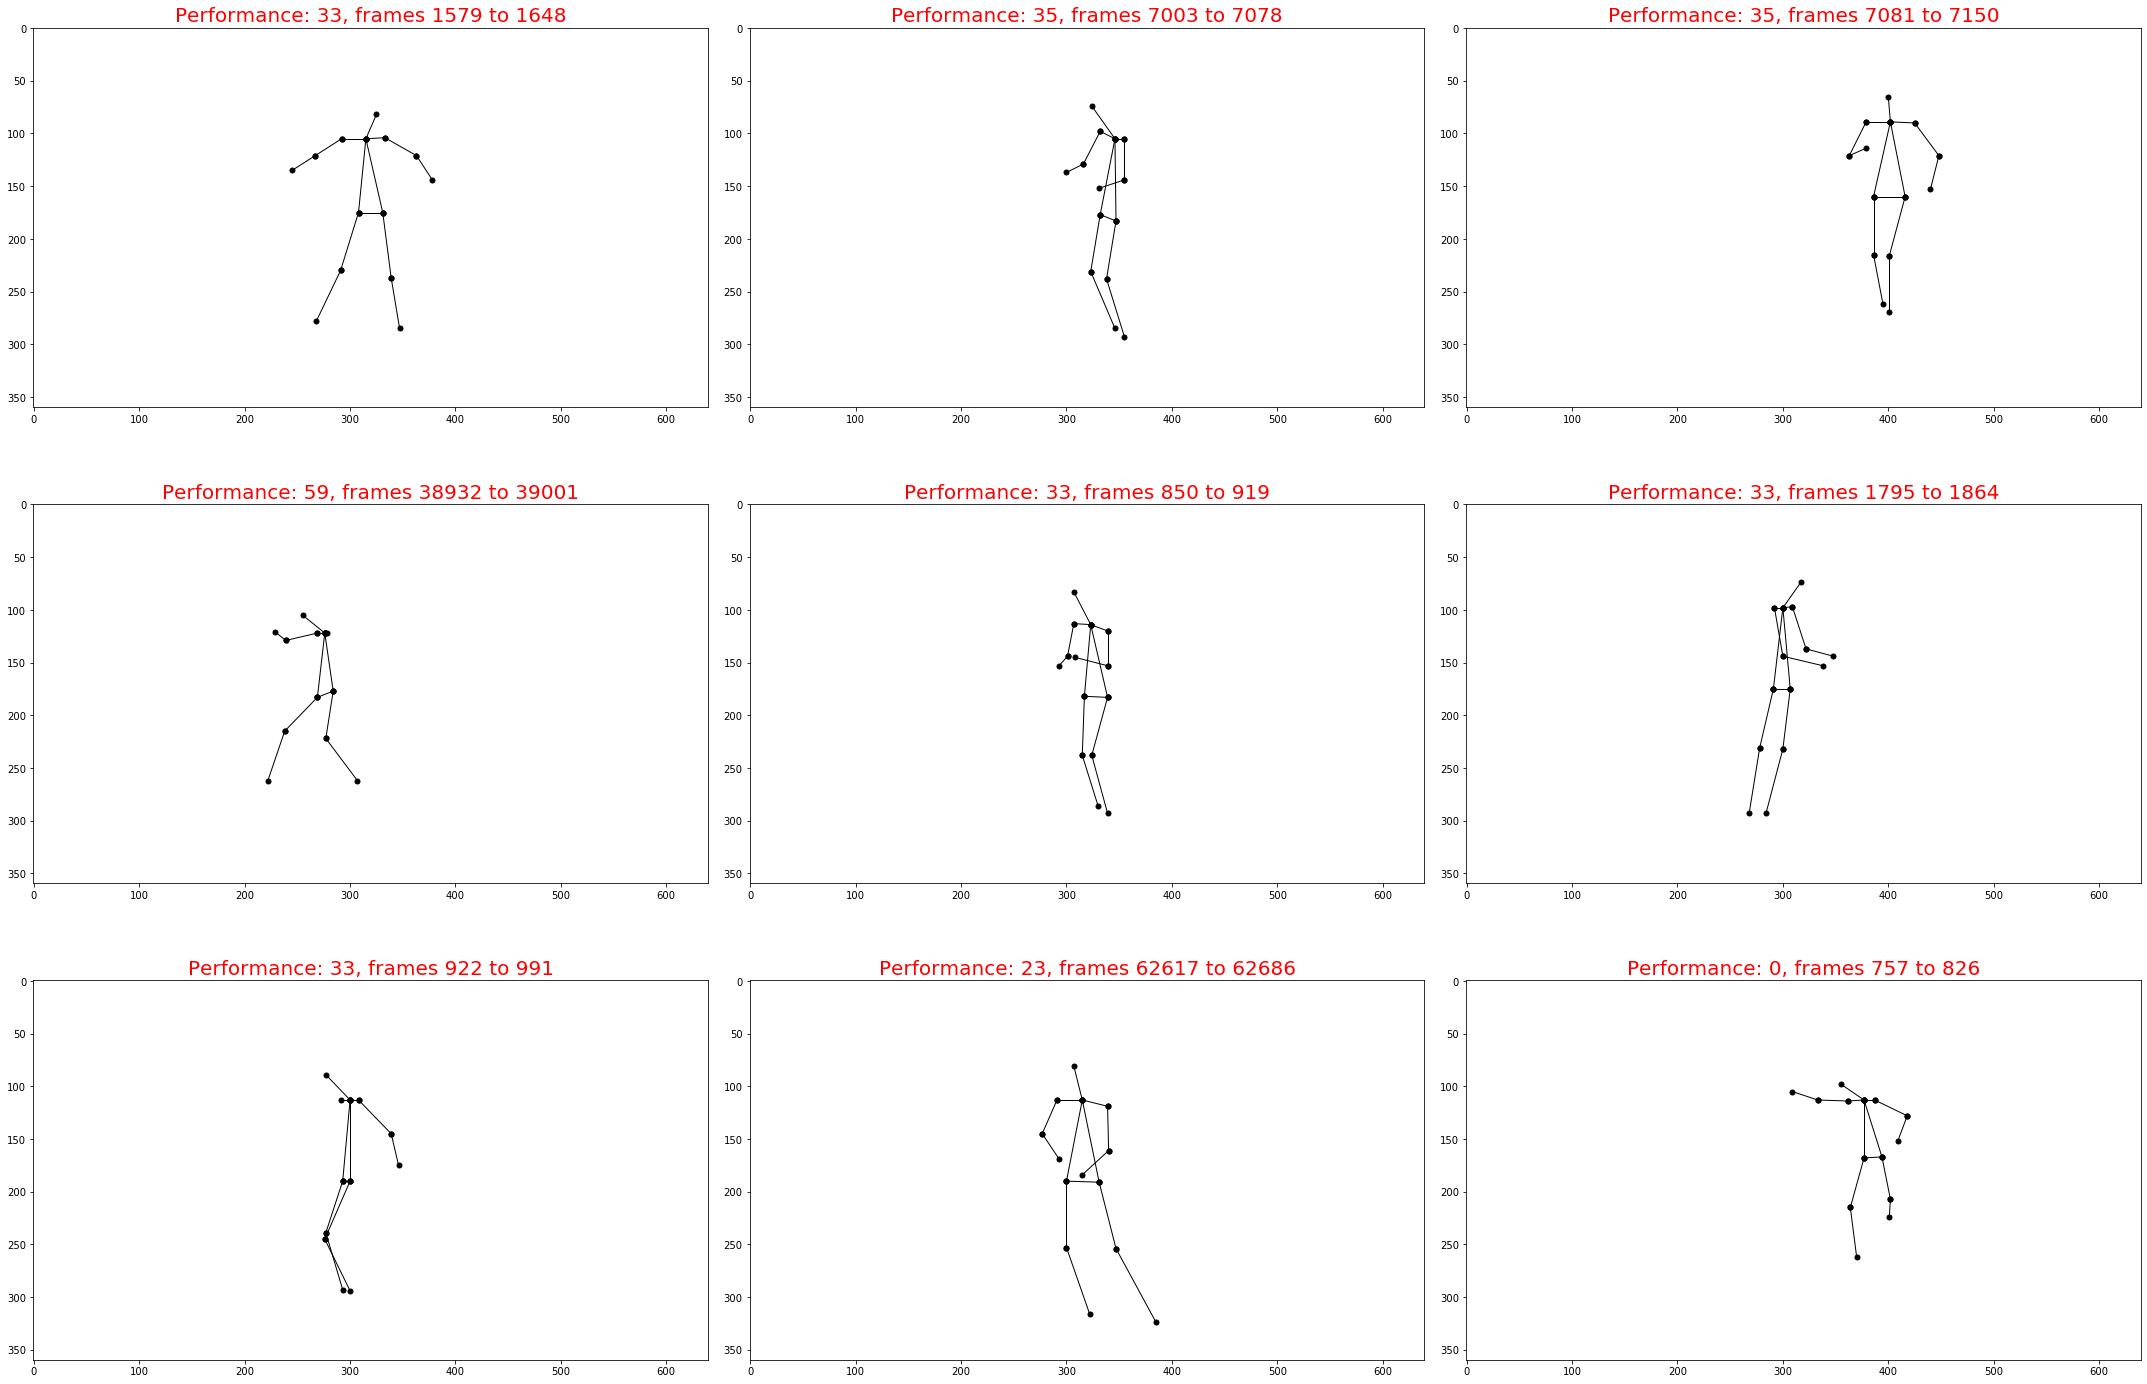

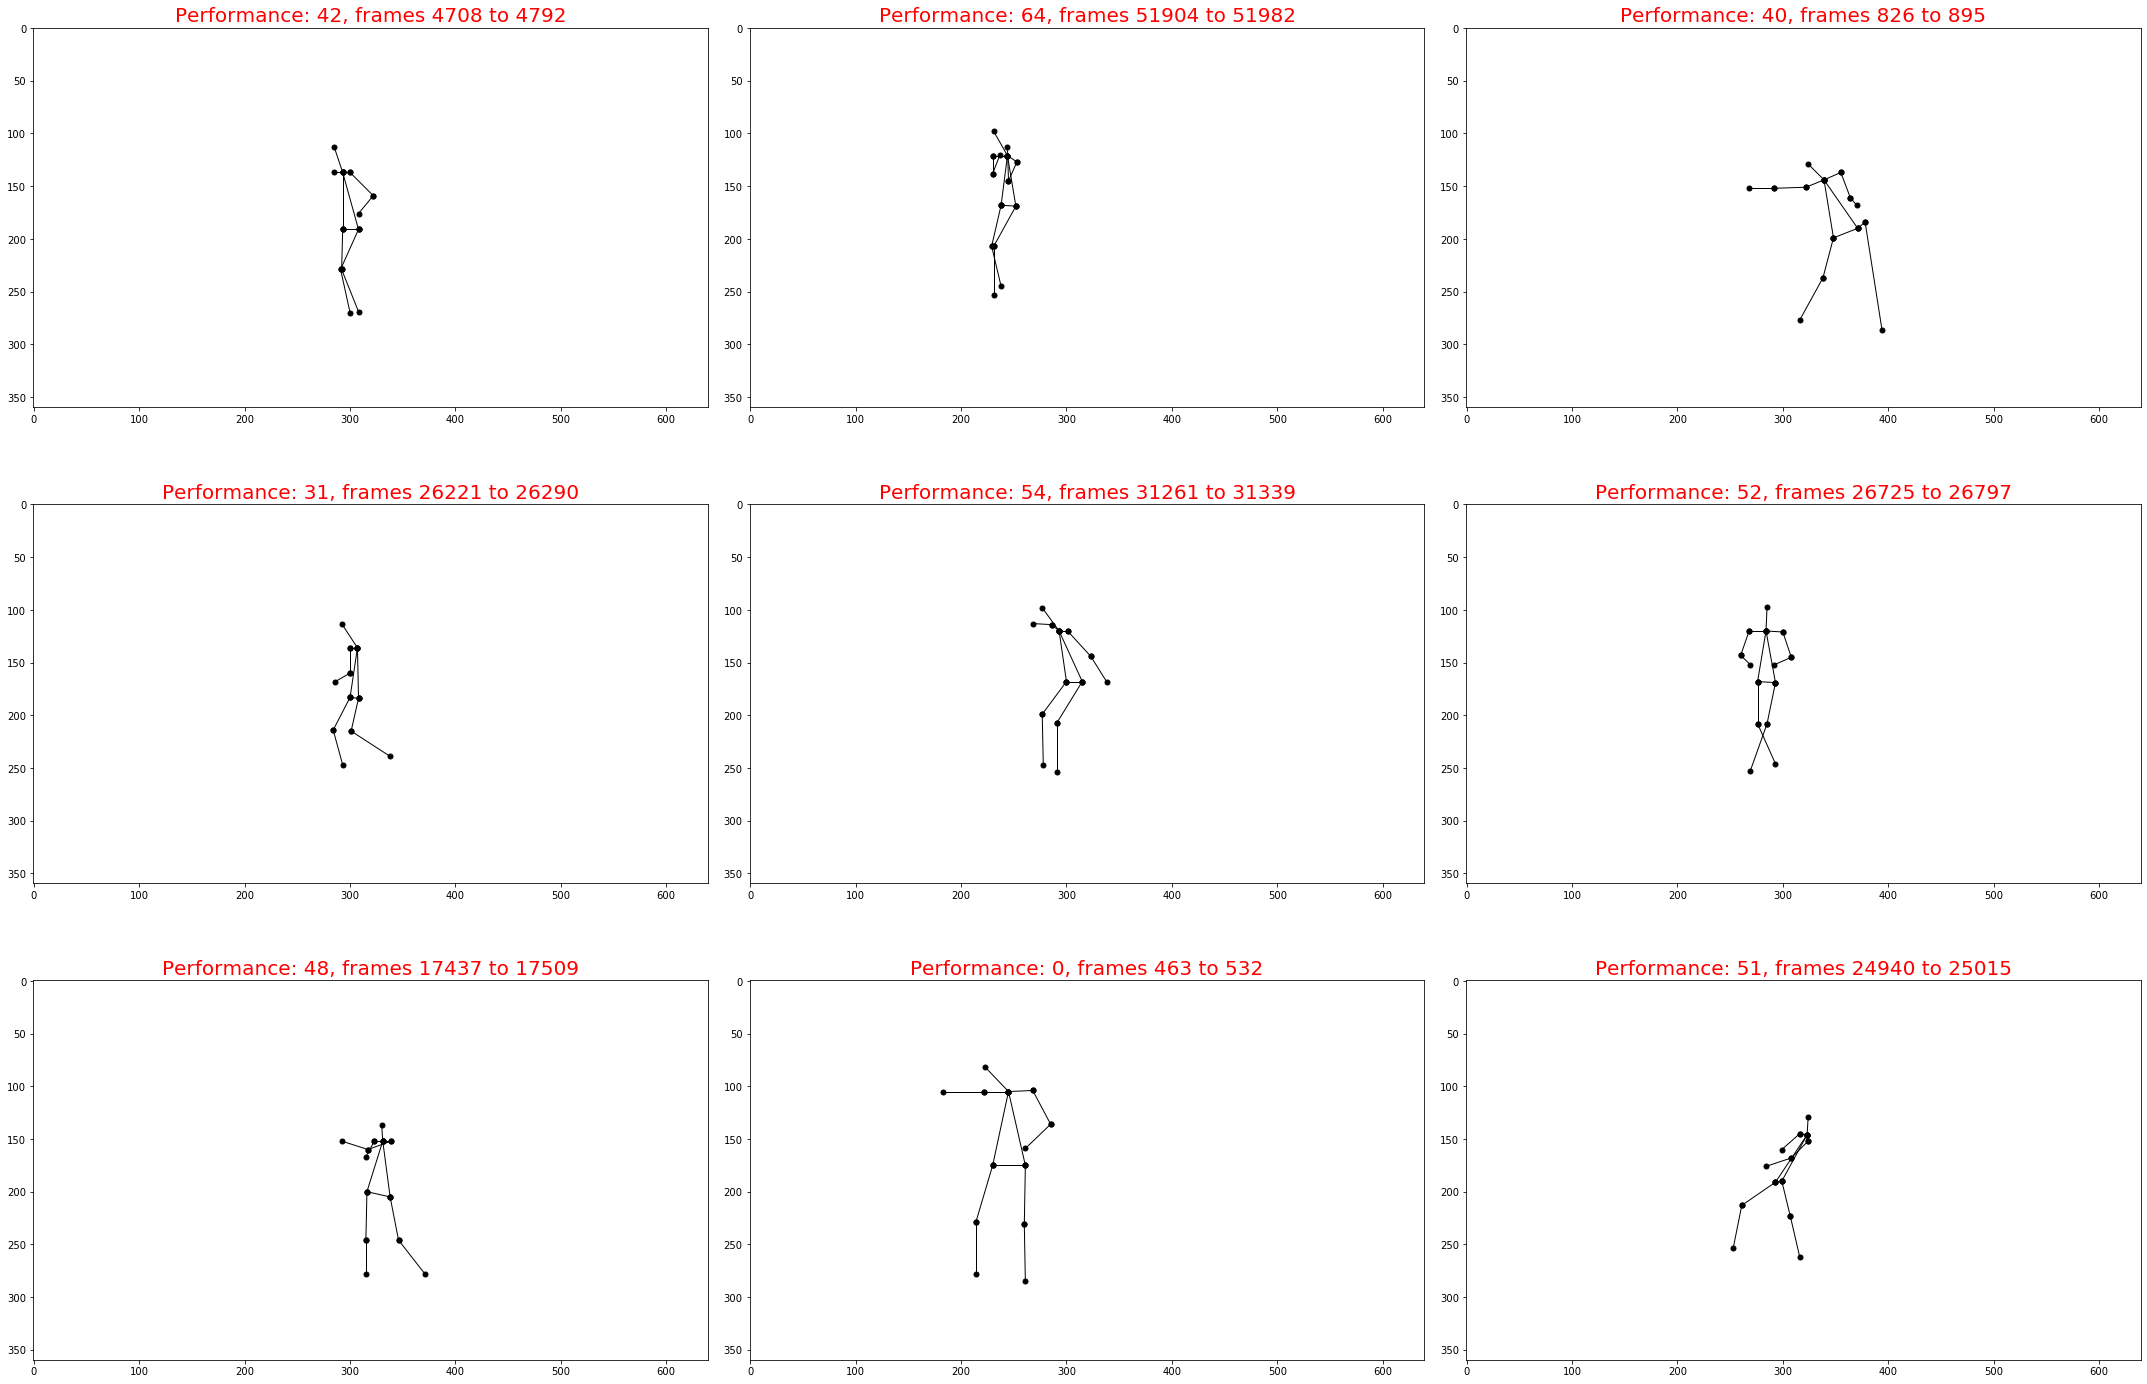

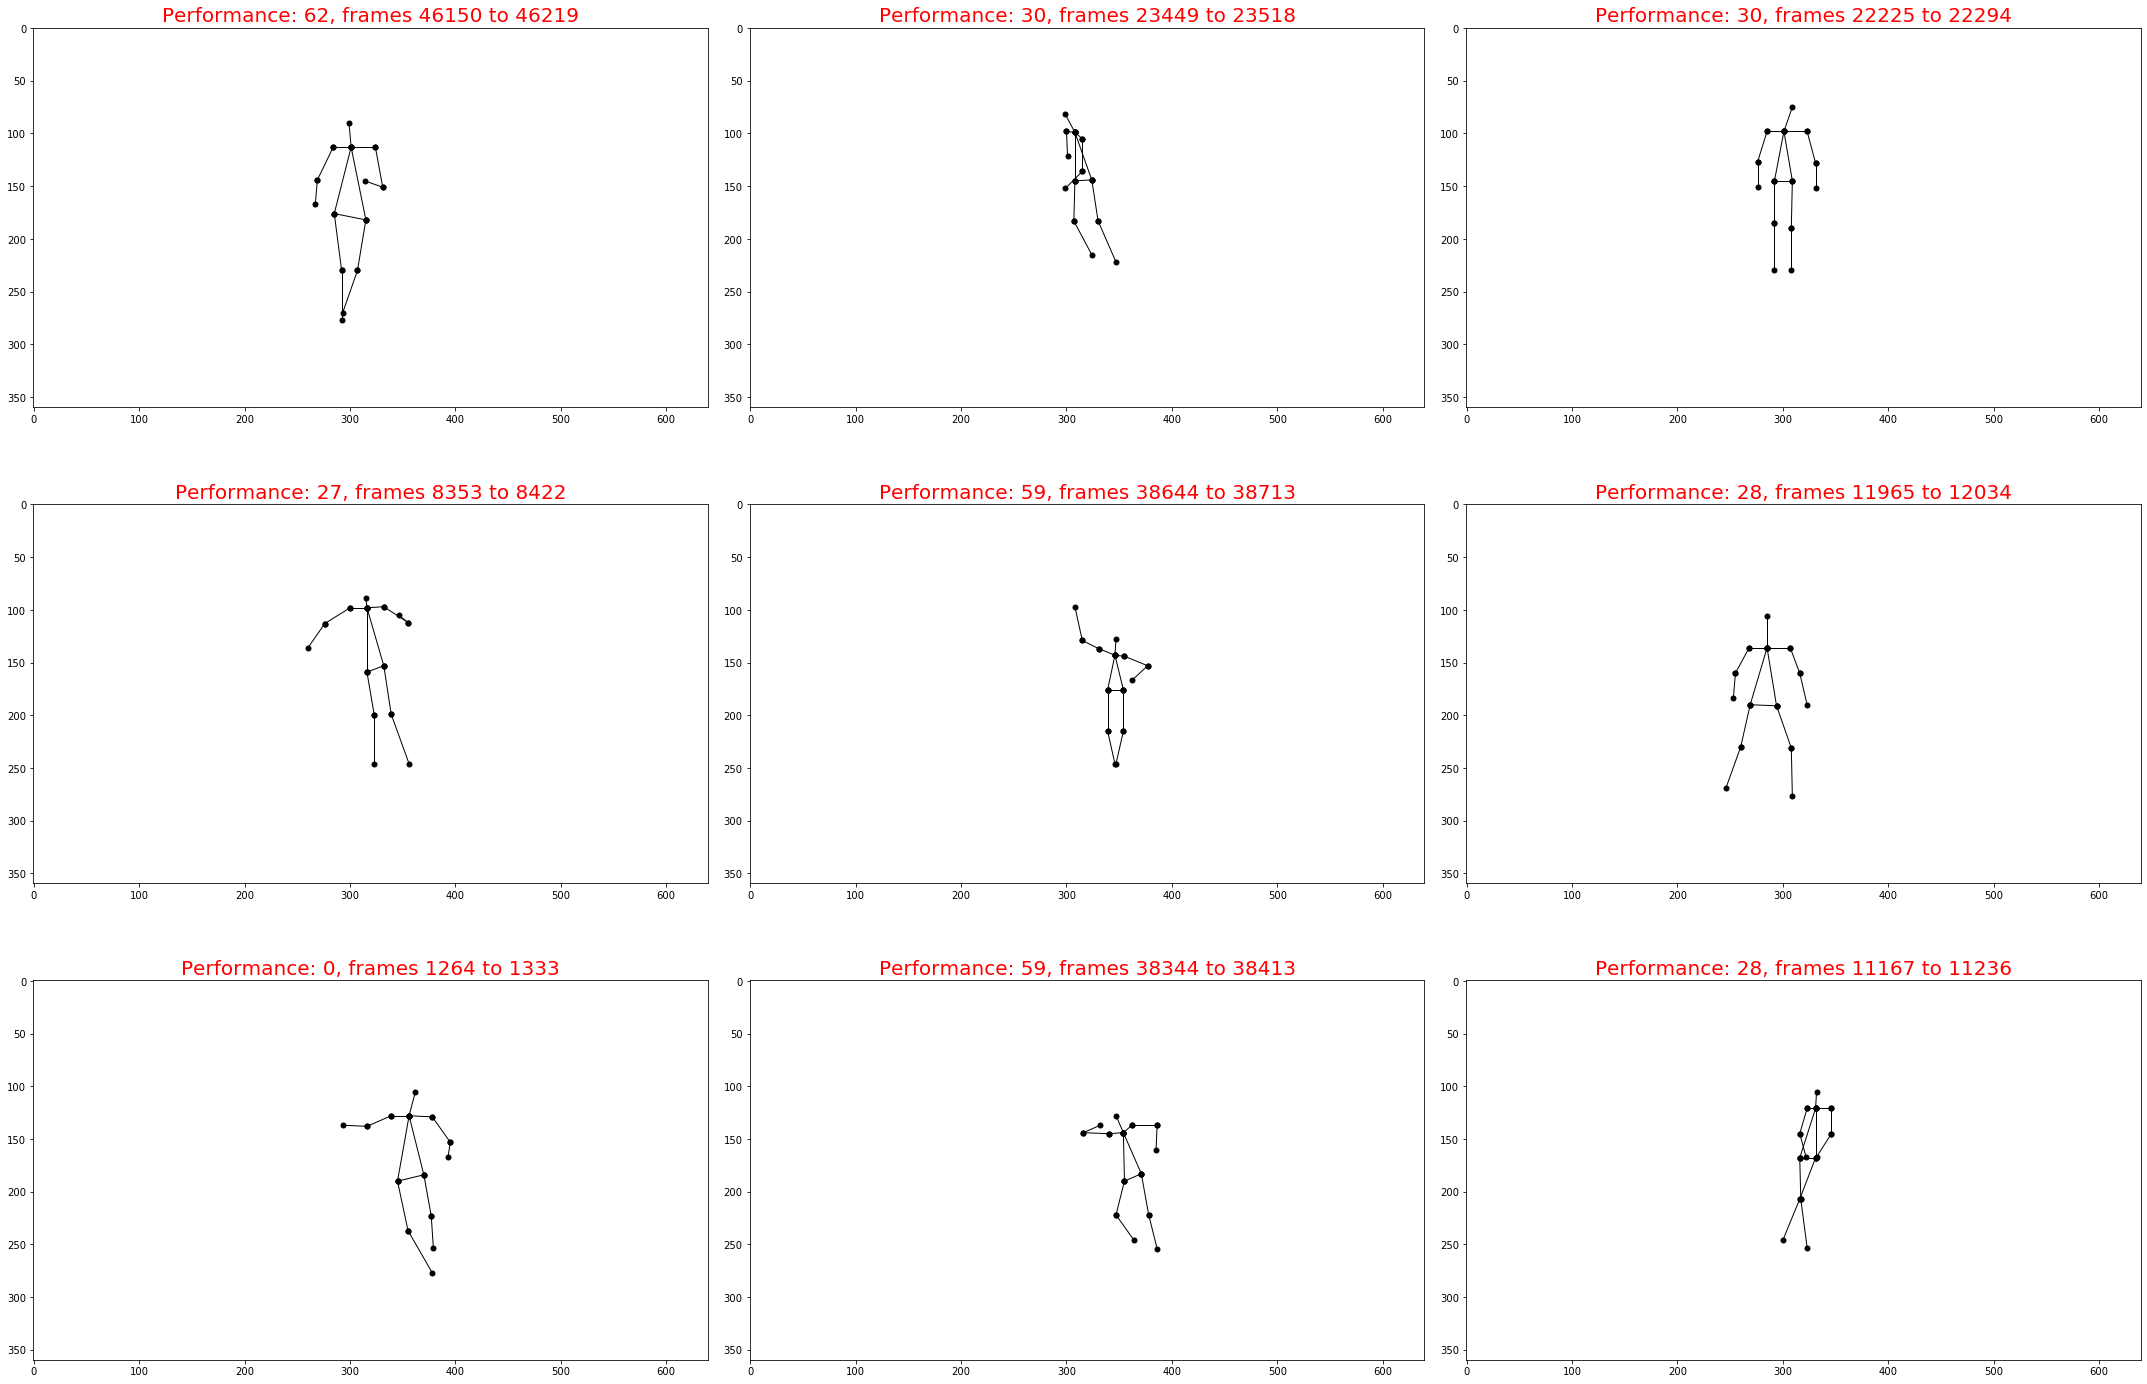

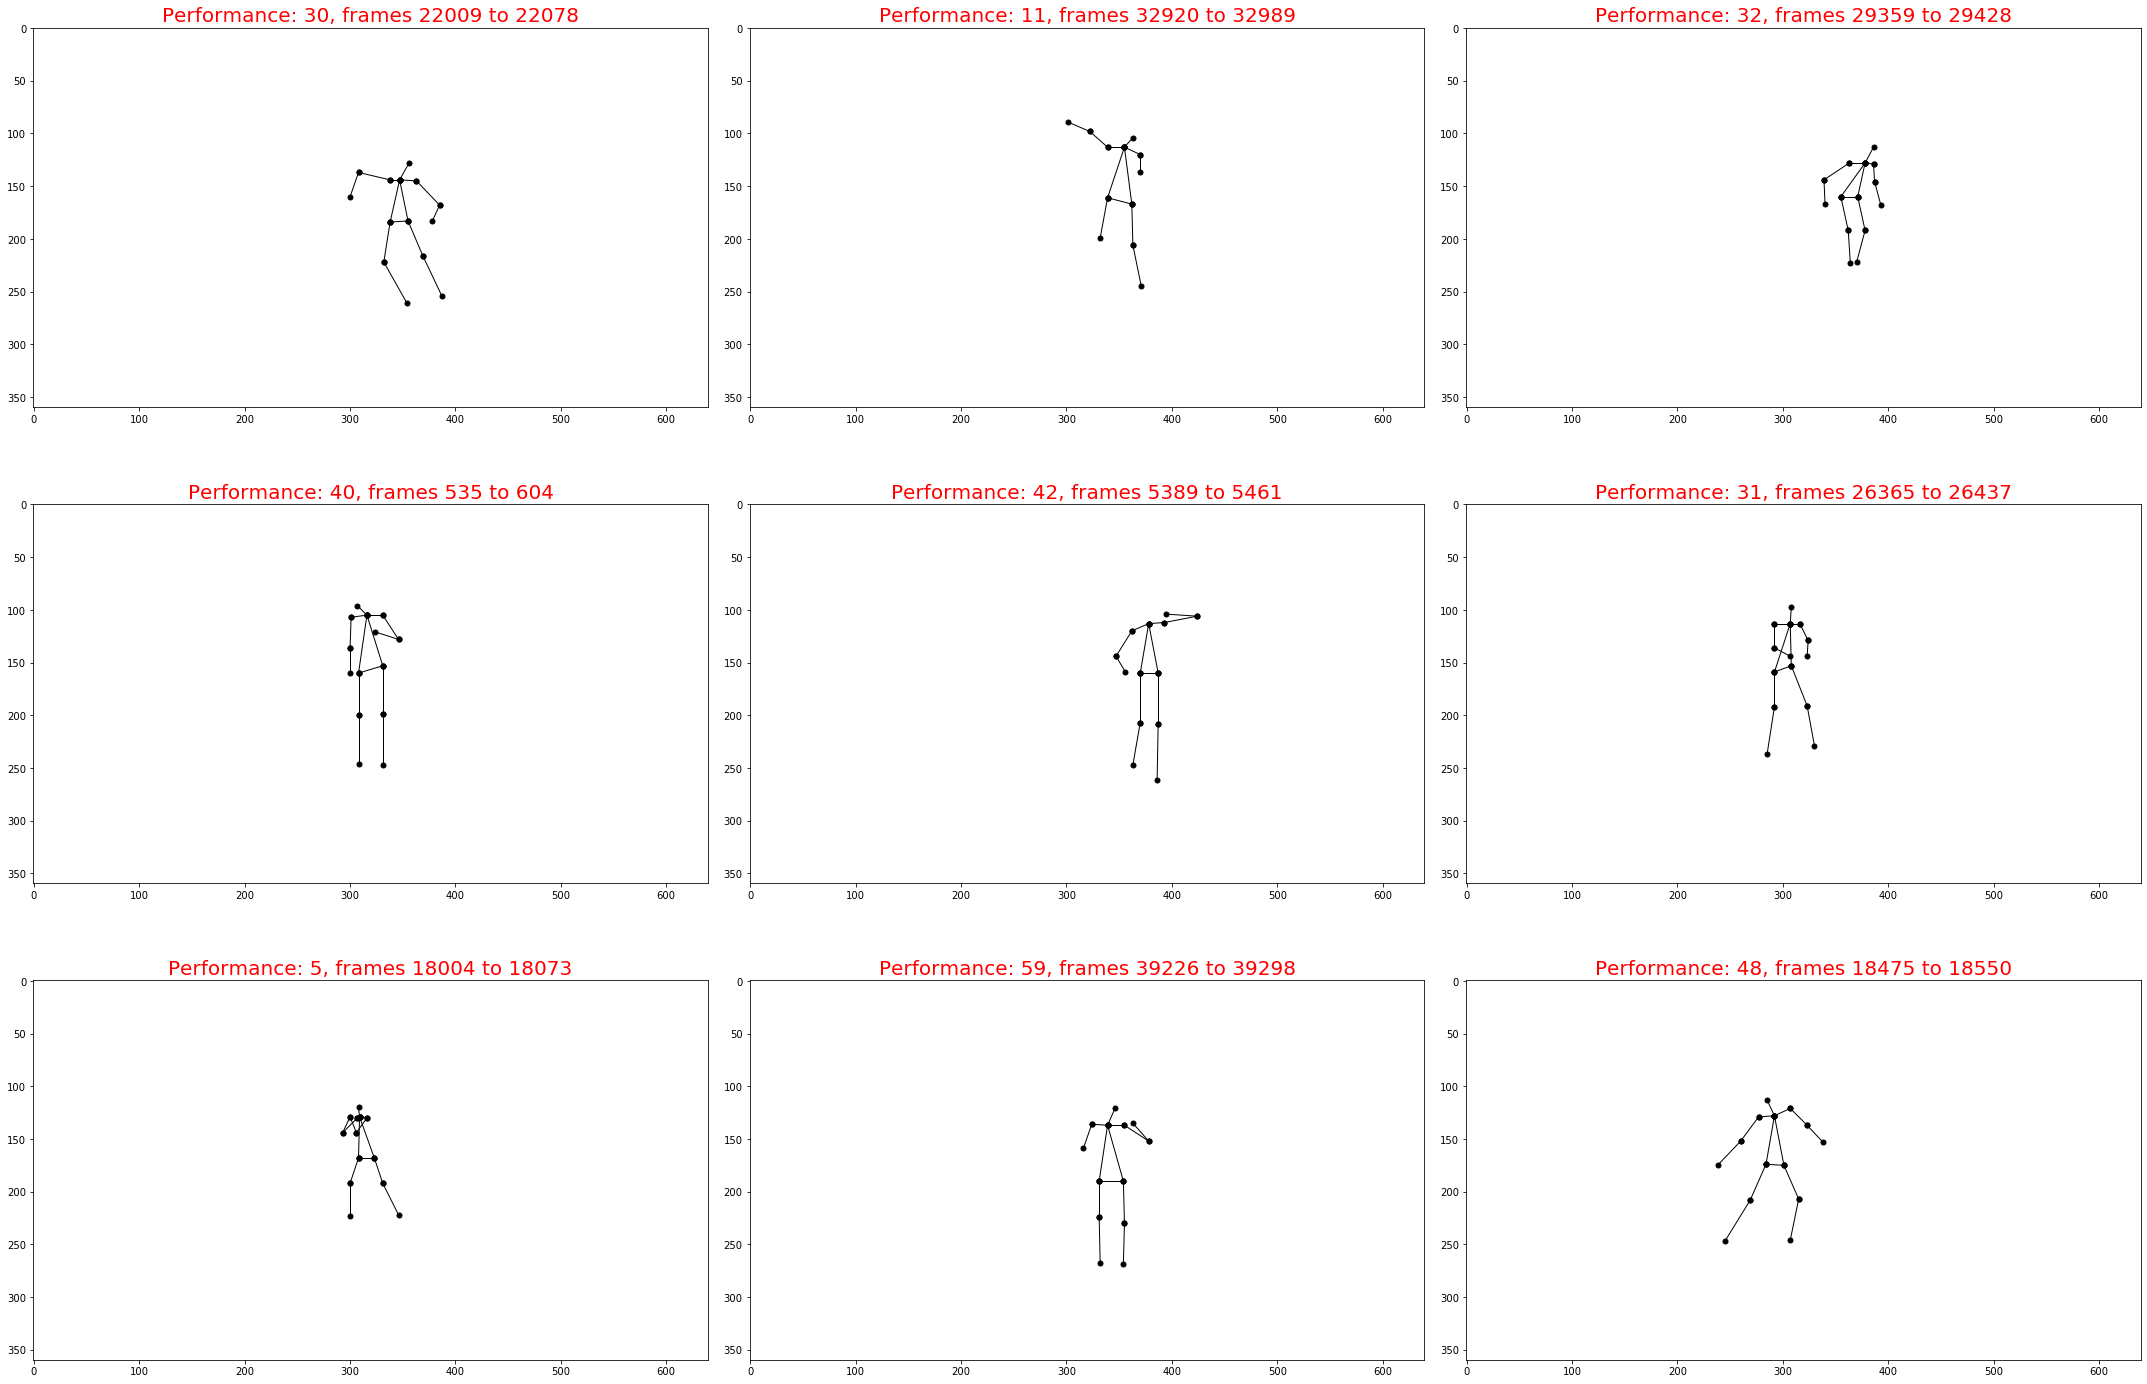

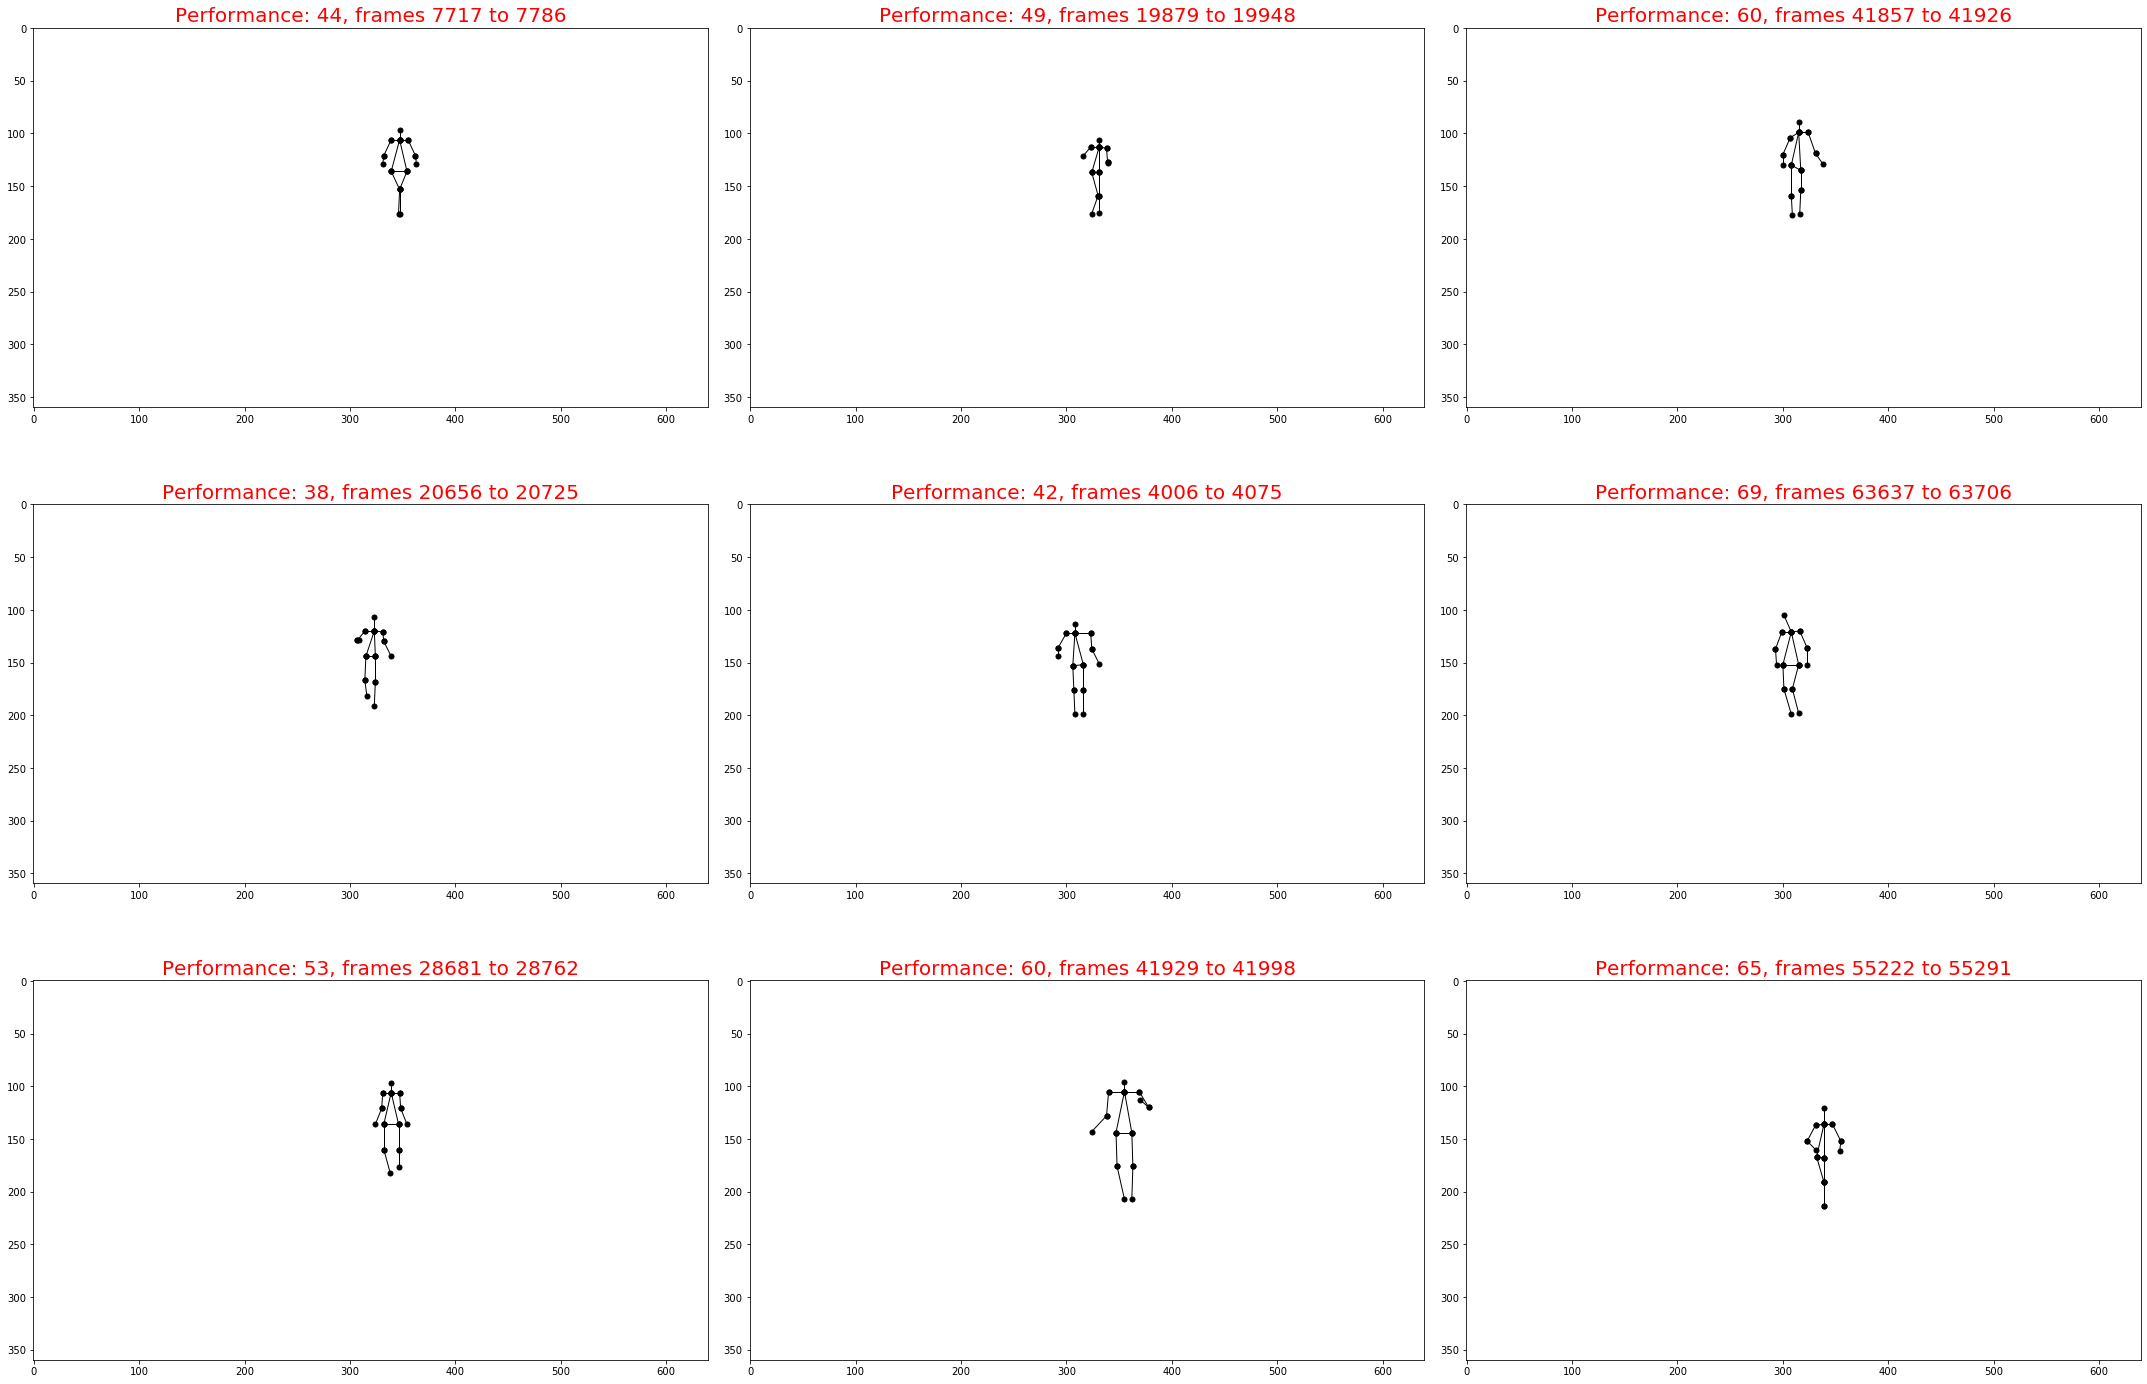

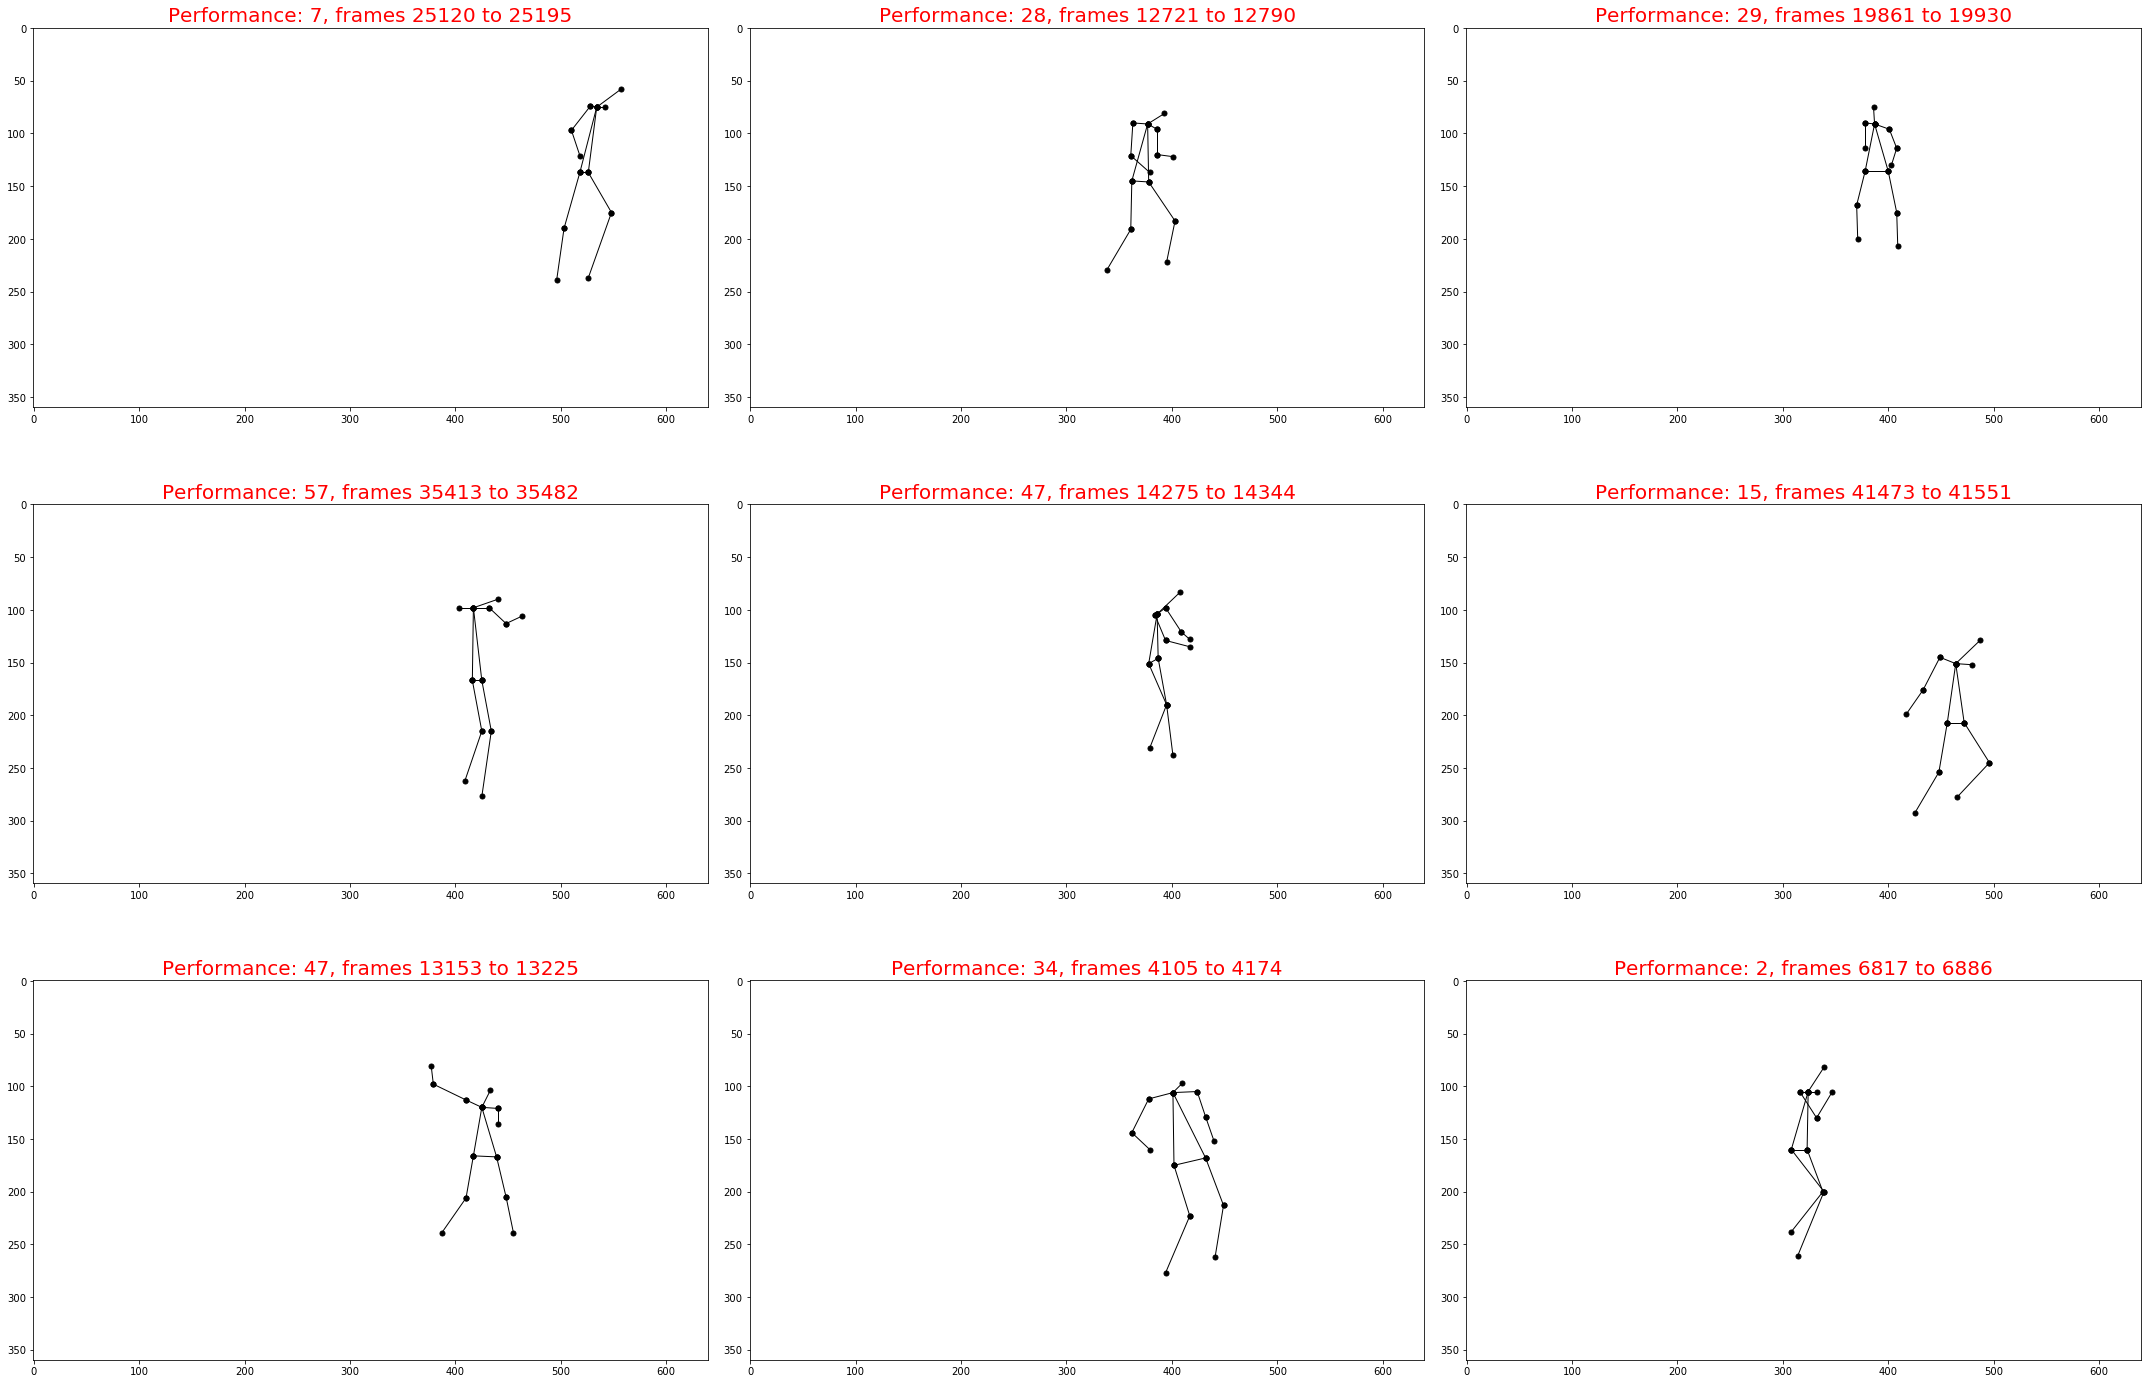

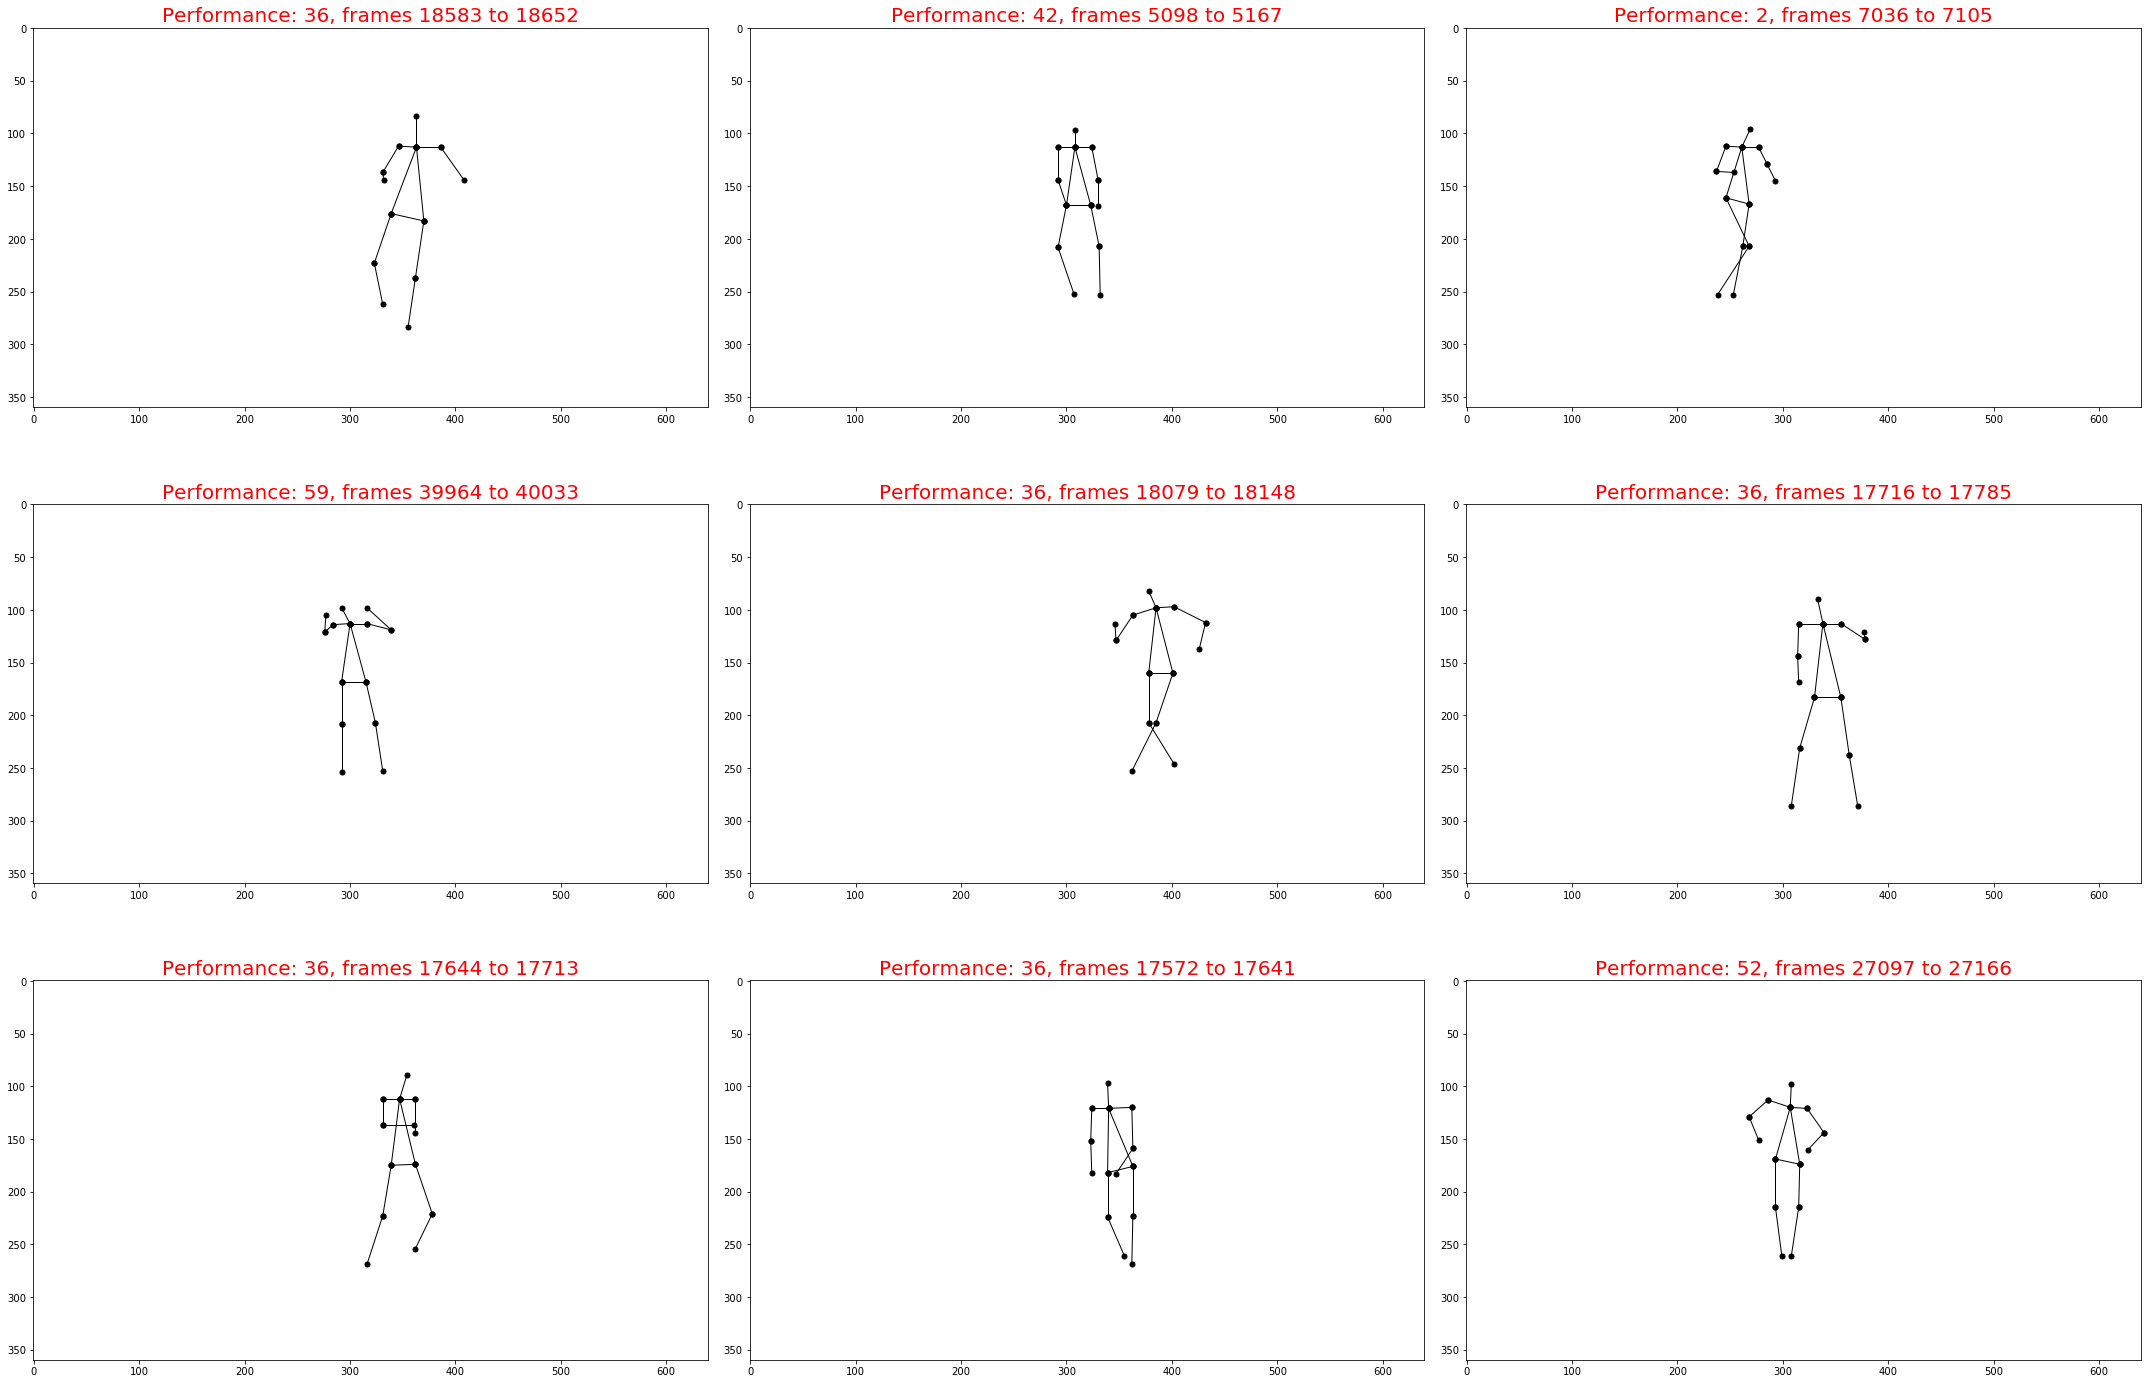

In [12]:
for i in range(1, 13):
    a = simClips(clips_dr, clips)
    sim_clips = a.getSimilarN_Poses(dist_metric="cosine") #sim_clips is a tuple (sim_meta and sim_data)
    plot_salsa_grid(sim_clips, "_f_lsa_cos_"+str(i))
    clips_vid = "../data/viz/full_lsa_cos_" + str(i)
    frames_for_clips = list(sim_clips[0][:,3:])
    frames_for_clips = [[f[0], f[1], f[1]+24*EVAL_TIME] for f in frames_for_clips]

    sim_clip_images = getSimilarVideoClipImages(frames_for_clips)
    similar9ClipsVideo(sim_clip_images, clips_vid)

## Visuals for the Presentation

In [13]:
import cv2
import time
import numpy as np
from random import randint
#import matplotlib.pyplot as plt
#%matplotlib inline
#import matplotlib
from IPython.display import Video, Image, display
vids_loc = "../data/vids/"

protoFile = "../resources/pose/coco/pose_deploy_linevec.prototxt"
weightsFile = "../resources/pose/coco/pose_iter_440000.caffemodel"
nPoints = 18
# COCO Output Format
keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16] ]

# index of pafs correspoding to the POSE_PAIRS
# e.g for POSE_PAIR(1,2), the PAFs are located at indices (31,32) of output, Similarly, (1,5) -> (39,40) and so on.
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], 
          [19,20], [21,22], [23,24], [25,26], [27,28], [29,30], 
          [47,48], [49,50], [53,54], [51,52], [55,56], 
          [37,38], [45,46]]

colors = [ [0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255],
         [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
         [0,0,255], [255,0,0], [200,200,0], [255,0,0], [200,200,0], [0,0,0]]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

def getPoseImage(image1):
    ###########################################
    # Find the Keypoints using Non Maximum Suppression on the Confidence Map
    def getKeypoints(probMap, threshold=0.1):

        mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)

        mapMask = np.uint8(mapSmooth>threshold)
        keypoints = []

        #find the blobs
        _, contours, _ = cv2.findContours(mapMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        #for each blob find the maxima
        for cnt in contours:
            blobMask = np.zeros(mapMask.shape)
            blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
            maskedProbMap = mapSmooth * blobMask
            _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
            keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],))

        return keypoints

    # Find valid connections between the different joints of a all persons present
    def getValidPairs(output):
        valid_pairs = []
        invalid_pairs = []
        n_interp_samples = 10
        paf_score_th = 0.1
        conf_th = 0.7
        # loop for every POSE_PAIR
        for k in range(len(mapIdx)):
            # A->B constitute a limb
            pafA = output[0, mapIdx[k][0], :, :]
            pafB = output[0, mapIdx[k][1], :, :]
            pafA = cv2.resize(pafA, (frameWidth, frameHeight))
            pafB = cv2.resize(pafB, (frameWidth, frameHeight))

            # Find the keypoints for the first and second limb
            candA = detected_keypoints[POSE_PAIRS[k][0]]
            candB = detected_keypoints[POSE_PAIRS[k][1]]
            nA = len(candA)
            nB = len(candB)

            # If keypoints for the joint-pair is detected
            # check every joint in candA with every joint in candB 
            # Calculate the distance vector between the two joints
            # Find the PAF values at a set of interpolated points between the joints
            # Use the above formula to compute a score to mark the connection valid

            if( nA != 0 and nB != 0):
                valid_pair = np.zeros((0,3))
                for i in range(nA):
                    max_j=-1
                    maxScore = -1
                    found = 0
                    for j in range(nB):
                        # Find d_ij
                        d_ij = np.subtract(candB[j][:2], candA[i][:2])
                        norm = np.linalg.norm(d_ij)
                        if norm:
                            d_ij = d_ij / norm
                        else:
                            continue
                        # Find p(u)
                        interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
                                                np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
                        # Find L(p(u))
                        paf_interp = []
                        for k in range(len(interp_coord)):
                            paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                                               pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ]) 
                        # Find E
                        paf_scores = np.dot(paf_interp, d_ij)
                        avg_paf_score = sum(paf_scores)/len(paf_scores)

                        # Check if the connection is valid
                        # If the fraction of interpolated vectors aligned with PAF is higher then threshold -> Valid Pair  
                        if ( len(np.where(paf_scores > paf_score_th)[0]) / n_interp_samples ) > conf_th :
                            if avg_paf_score > maxScore:
                                max_j = j
                                maxScore = avg_paf_score
                                found = 1
                    # Append the connection to the list
                    if found:            
                        valid_pair = np.append(valid_pair, [[candA[i][3], candB[max_j][3], maxScore]], axis=0)

                # Append the detected connections to the global list
                valid_pairs.append(valid_pair)
            else: # If no keypoints are detected
                #print("No Connection : k = {}".format(k))
                invalid_pairs.append(k)
                valid_pairs.append([])
        #print(valid_pairs)
        return valid_pairs, invalid_pairs

    # This function creates a list of keypoints belonging to each person
    # For each detected valid pair, it assigns the joint(s) to a person
    # It finds the person and index at which the joint should be added. This can be done since we have an id for each joint
    def getPersonwiseKeypoints(valid_pairs, invalid_pairs):
        # the last number in each row is the overall score 
        personwiseKeypoints = -1 * np.ones((0, 19))

        for k in range(len(mapIdx)):
            if k not in invalid_pairs:
                partAs = valid_pairs[k][:,0]
                partBs = valid_pairs[k][:,1]
                indexA, indexB = np.array(POSE_PAIRS[k])

                for i in range(len(valid_pairs[k])): 
                    found = 0
                    person_idx = -1
                    for j in range(len(personwiseKeypoints)):
                        if personwiseKeypoints[j][indexA] == partAs[i]:
                            person_idx = j
                            found = 1
                            break

                    if found:
                        personwiseKeypoints[person_idx][indexB] = partBs[i]
                        personwiseKeypoints[person_idx][-1] += keypoints_list[partBs[i].astype(int), 2] + valid_pairs[k][i][2]

                    # if find no partA in the subset, create a new subset
                    elif not found and k < 17:
                        row = -1 * np.ones(19)
                        row[indexA] = partAs[i]
                        row[indexB] = partBs[i]
                        # add the keypoint_scores for the two keypoints and the paf_score 
                        row[-1] = sum(keypoints_list[valid_pairs[k][i,:2].astype(int), 2]) + valid_pairs[k][i][2]
                        personwiseKeypoints = np.vstack([personwiseKeypoints, row])
        return personwiseKeypoints


    ###########################################
    frameWidth = image1.shape[1]
    frameHeight = image1.shape[0]

    t = time.time()
    

    # Fix the input Height and get the width according to the Aspect Ratio
    inHeight = 368
    inWidth = int((inHeight/frameHeight)*frameWidth)

    inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)
    output = net.forward()
    detected_keypoints = []
    keypoints_list = np.zeros((0,3))
    keypoint_id = 0
    threshold = 0.1

    for part in range(nPoints):
        probMap = output[0,part,:,:]
        probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))

        keypoints = getKeypoints(probMap, threshold)
        #print("Keypoints - {} : {}".format(keypointsMapping[part], keypoints))
        keypoints_with_id = []
        for i in range(len(keypoints)):
            keypoints_with_id.append(keypoints[i] + (keypoint_id,))
            keypoints_list = np.vstack([keypoints_list, keypoints[i]])
            keypoint_id += 1

        detected_keypoints.append(keypoints_with_id)

    frameClone = image1.copy()
    for i in range(nPoints):
        for j in range(len(detected_keypoints[i])):
            cv2.circle(frameClone, detected_keypoints[i][j][0:2], 3, [0,0,255], -1, cv2.LINE_AA)
    #plt.figure(figsize=[15,15])
    #plt.imshow(frameClone[:,:,[2,1,0]])

    valid_pairs, invalid_pairs = getValidPairs(output)
    personwiseKeypoints = getPersonwiseKeypoints(valid_pairs, invalid_pairs)

    for i in range(17):
        for n in range(len(personwiseKeypoints)):
            index = personwiseKeypoints[n][np.array(POSE_PAIRS[i])]
            if -1 in index:
                continue
            B = np.int32(keypoints_list[index.astype(int), 0])
            A = np.int32(keypoints_list[index.astype(int), 1])
            cv2.line(frameClone, (B[0], A[0]), (B[1], A[1]), colors[i], 2, cv2.LINE_AA)
        
    return personwiseKeypoints, frameClone


In [15]:
def poseDetectOnFrames(file_name, file_output, start_frame=0, end_frame=20, step=1, fps = 24):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, fps, (640,  360))
    #---
    count = 0
    kpts=[]
    success = True
    while success:
        success,image = cap.read()
        if count > start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            kpts_frame, img1 = getPoseImage(image)
            kpts.append(kpts_frame)
            out.write(img1)
        if count>end_frame:
            break
        count += 1
    print(f"count is: {count}")
    cap.release()
    out.release()
    
    return kpts

def getFrames(file_name, file_output, start_frame=0, end_frame=20, step=1):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    images = []
    
    #---
    #fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    #out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
    #---
    count = 0
    success = True
    while success:
        success,image = cap.read()
        if count >= start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            #img1 = getPoseImage(image)
            #cv2.line(img1, (160, 180), (480, 180), [0,0,0], 3, cv2.LINE_AA)
            #out.write(img1)
            images.append(image)
        if count>end_frame:
            break
        count += 1
    #print(f"count is: {count}")
    cap.release()
    #out.release()
    
    return images

def getSimilarVideoClipImages(list_of_video_clips):
    #clips = len(list_of_video_clips)
    imgs = [] # This is a No of Clips X time steps X Images (W X H X Channels)
    
    for vd_clips in list_of_video_clips:
        #print(f"{vd_clips[0]} - {vd_clips[1]} to {vd_clips[2]}  ")
        temp_imgs = getFrames(vids_loc+vd_clips[0], "doesNotMatter", start_frame=vd_clips[1], end_frame=vd_clips[2])
        imgs.append(temp_imgs)
    
    return imgs

def similar9ClipsVideo(sim_clip_images, file_output):
    """
    """
    sim_clip_images = np.array(sim_clip_images)
    t_steps = sim_clip_images.shape[1]
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (3*640,  3*360))
    
    #---
    for t in range(0, t_steps):
        imgs_at_t = sim_clip_images[:,t,...]
        t1 = np.concatenate((imgs_at_t[0,...], imgs_at_t[1,...], imgs_at_t[2,...]), axis = 1)
        t2 = np.concatenate((imgs_at_t[3,...], imgs_at_t[4,...], imgs_at_t[5,...]), axis = 1)
        t3 = np.concatenate((imgs_at_t[6,...], imgs_at_t[7,...], imgs_at_t[8,...]), axis = 1)

        f = np.concatenate((t1, t2, t3), axis=0)
        out.write(f)
    out.release()

In [16]:
vect_vid_file = "../data/f134_69A5LIBwXt4.mp4"
outputFile = "../data/viz/processed_69A5LIBwXt4_v2"

keypoints = poseDetectOnFrames(vect_vid_file, outputFile, start_frame=6000, end_frame=6210, fps=30)

count is: 6211


In [18]:
from joblib import load, dump
dump(keypoints, "../data/viz/kpts_processed_69A5LIBwXt4_v2.joblib")

['../data/viz/kpts_processed_69A5LIBwXt4_v2.joblib']